## 데이터 전처리 실습

### 실습 데이터셋 안내

- 2022년 1~12월 간 lg.com의 마케팅 실적 데이터입니다.<br>
- 변수(열)에 대한 간단한 설명입니다.

| 열이름 | 설명 | 특징 |
| :----- | :--- | :--- |
| country | 국가 코드 | au: 호주, br: 브라질, de: 독일, fr: 프랑스, it: 이탈리아, <br> uk: 영국 |
| date | 웹 행동 발생 일자 | 20220101~20221231 |
| product_category | 제품 대분류 | HE, HA, BS(LG전자 사업부별 분류) |
| product_subcategory | 제품 소분류 | 13개 카테고리(제품별 분류) |
| product_detail_page | 제품 상세 페이지 유입 수 | 수치형 |
| add_to_cart | 장바구니 추가 클릭 수 | 수치형 |
| sales_amt | 판매수량 | 수치형(단위: 개) |
| sales_usd | 판매금액 | 수치형(단위: 달러) |

- 실습 데이터인 **'Online_Mall.csv'** 파일은 data 폴더에 있습니다.
  - 구분자는 콤마(,)이고 인코딩 방식은 **ASCII**입니다.

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import chardet
import numpy as np
import pandas as pd
import joblib

In [2]:
# Jupyter Notebook에서 실수를 소수점 셋째 자리까지 출력하도록 설정합니다.
%precision 3

'%.3f'

In [3]:
# pandas 객체에서 실수를 소수점 셋째 자리까지 출력하도록 설정합니다.
pd.options.display.precision = 3

### 작업 경로 확인 및 변경

In [4]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/LGE-HE/project/code'

In [5]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [6]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
sorted(os.listdir())

['App_Usage.csv',
 'Online_Mall.csv',
 'Online_Mall_Merged.xlsx',
 'Online_Mall_Prep.z',
 'Online_Mall_Rawdat.xlsx']

### 문자 인코딩 방식 확인

In [7]:
# csv 파일명을 변수에 할당합니다. 여러 번 재사용하기 위함입니다.
fileName = 'Online_Mall.csv'

In [8]:
# csv 파일을 bytes 문자열로 읽고 text에 할당합니다.
# [힌트] with 문, open() 및 read() 함수를 사용하세요.
with open(file = fileName, mode = 'rb') as file:
    text = file.read()

In [9]:
# 바이너리 텍스트의 인코딩 방식을 확인합니다.
# [힌트] chardet.detect() 함수를 사용하세요.
chardet.detect(text)

{'encoding': 'ascii', 'confidence': 1.000, 'language': ''}

### 실습 데이터셋 준비

In [10]:
# 링크를 읽고 데이터프레임 rawdat를 생성합니다.
# [힌트] pd.read_csv() 함수를 사용하세요.
# [참고] 문자 인코딩 방식이 ASCII와 UTF-8이면 encoding 매개변수를 생략할 수 있습니다.
rawdat = pd.read_csv(filepath_or_buffer = fileName)

In [11]:
# rawdat의 정보를 확인합니다.
# [힌트] info() 함수를 사용하세요.
rawdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           13908 non-null  int64  
 1   country              13908 non-null  object 
 2   date                 13908 non-null  int64  
 3   product_category     13908 non-null  object 
 4   product_subcategory  13908 non-null  object 
 5   product_detail_page  13908 non-null  int64  
 6   add_to_cart          13908 non-null  int64  
 7   sales_amt            13908 non-null  int64  
 8   sales_usd            13908 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 978.0+ KB


In [12]:
# rawdat의 처음 5행을 출력합니다.
# [힌트] head() 함수를 사용하세요.
rawdat.head()

,Unnamed: 0,country,date,product_category,product_subcategory,product_detail_page,add_to_cart,sales_amt,sales_usd
0,0,au,20220101,HE,TV,4485,17,10,398.96
1,1,au,20220102,HA,Refrigerator,3419,20,2,1212.33
2,2,au,20220102,HE,TV,4676,14,3,113.99
3,3,au,20220103,HA,Cooking_Appliance,546,3,2,279.17
4,4,au,20220103,HA,Refrigerator,3691,7,5,106.26


In [13]:
# rawdat의 마지막 5행을 출력합니다.
# [힌트] tail() 함수를 사용하세요.
rawdat.tail()

,Unnamed: 0,country,date,product_category,product_subcategory,product_detail_page,add_to_cart,sales_amt,sales_usd
13903,13903,uk,20221231,HA,Refrigerator,756,13,6,12919.57
13904,13904,uk,20221231,HA,Washer,579,21,7,6977.92
13905,13905,uk,20221231,HA,Washer_Dryer,278,10,4,3722.52
13906,13906,uk,20221231,HE,Audio_CAV,1939,32,11,496.18
13907,13907,uk,20221231,HE,TV,8393,157,7,10802.75


### 실습 데이터셋 전처리

In [14]:
# rawdat의 열이름을 출력합니다.
# [힌트] columns 속성을 사용하세요.
rawdat.columns

Index(['Unnamed: 0', 'country', 'date', 'product_category',
       'product_subcategory', 'product_detail_page', 'add_to_cart',
       'sales_amt', 'sales_usd'],
      dtype='object')

In [15]:
# rawdat에서 불필요한 열인 'Unnamed: 0'을 삭제한 결과를 출력합니다.
# [힌트] drop() 함수를 사용하세요.
rawdat.drop(columns = ['Unnamed: 0'])

,country,date,product_category,product_subcategory,product_detail_page,add_to_cart,sales_amt,sales_usd
0,au,20220101,HE,TV,4485,17,10,398.96
1,au,20220102,HA,Refrigerator,3419,20,2,1212.33
2,au,20220102,HE,TV,4676,14,3,113.99
3,au,20220103,HA,Cooking_Appliance,546,3,2,279.17
4,au,20220103,HA,Refrigerator,3691,7,5,106.26
...,...,...,...,...,...,...,...,...
13903,uk,20221231,HA,Refrigerator,756,13,6,12919.57
13904,uk,20221231,HA,Washer,579,21,7,6977.92
13905,uk,20221231,HA,Washer_Dryer,278,10,4,3722.52
13906,uk,20221231,HE,Audio_CAV,1939,32,11,496.18


In [16]:
# 위 코드 실행 결과를 rawdat에 재할당합니다.
rawdat = rawdat.drop(columns = ['Unnamed: 0'])

In [17]:
# rawdat의 처음 5행을 출력합니다.
rawdat.head()

,country,date,product_category,product_subcategory,product_detail_page,add_to_cart,sales_amt,sales_usd
0,au,20220101,HE,TV,4485,17,10,398.96
1,au,20220102,HA,Refrigerator,3419,20,2,1212.33
2,au,20220102,HE,TV,4676,14,3,113.99
3,au,20220103,HA,Cooking_Appliance,546,3,2,279.17
4,au,20220103,HA,Refrigerator,3691,7,5,106.26


In [18]:
# rawdat의 열이름을 출력합니다.
rawdat.columns

Index(['country', 'date', 'product_category', 'product_subcategory',
       'product_detail_page', 'add_to_cart', 'sales_amt', 'sales_usd'],
      dtype='object')

In [19]:
# rawdat의 열이름에서 'product_'를 삭제한 결과를 출력합니다.
rawdat.columns.str.replace(pat = 'product_', repl = '')

Index(['country', 'date', 'category', 'subcategory', 'detail_page',
       'add_to_cart', 'sales_amt', 'sales_usd'],
      dtype='object')

In [20]:
# 위 코드 실행 결과를 rawdat 열이름에 할당하여 변경합니다.
rawdat.columns = rawdat.columns.str.replace(pat = 'product_', repl = '')

In [21]:
# rawdat의 처음 5행을 출력합니다.
rawdat.head()

,country,date,category,subcategory,detail_page,add_to_cart,sales_amt,sales_usd
0,au,20220101,HE,TV,4485,17,10,398.96
1,au,20220102,HA,Refrigerator,3419,20,2,1212.33
2,au,20220102,HE,TV,4676,14,3,113.99
3,au,20220103,HA,Cooking_Appliance,546,3,2,279.17
4,au,20220103,HA,Refrigerator,3691,7,5,106.26


In [22]:
# rawdat의 열이름에서 일부를 변경하고 rawdat에 재할당합니다.
# 'detail_page' -> 'page'
# 'add_to_cart' -> 'cart'
# 'sales_amt' -> 'vol'
# 'sales_usd' -> 'usd'
# [힌트] rename() 함수의 columns 매개변수에 딕셔너리를 지정하세요.
rawdat = rawdat.rename(columns = {
    'detail_page': 'page', 
    'add_to_cart': 'cart', 
    'sales_amt': 'vol', 
    'sales_usd': 'usd'
})

In [23]:
# rawdat의 열이름을 출력합니다.
rawdat.columns

Index(['country', 'date', 'category', 'subcategory', 'page', 'cart', 'vol',
       'usd'],
      dtype='object')

In [24]:
# rawdat의 열별 자료형을 확인합니다.
rawdat.dtypes

country         object
date             int64
category        object
subcategory     object
page             int64
cart             int64
vol              int64
usd            float64
dtype: object

In [25]:
# date 열을 날짜시간형으로 변환한 결과를 출력합니다.
# [힌트] astype() 함수에 'datetime64[ns]'을 지정하세요.
# [주의] 날짜시간형으로 변환하려면 정수를 문자열로 먼저 변환해야 합니다.
rawdat['date'].astype(str).astype('datetime64[ns]')

0       2022-01-01
1       2022-01-02
2       2022-01-02
3       2022-01-03
4       2022-01-03
           ...    
13903   2022-12-31
13904   2022-12-31
13905   2022-12-31
13906   2022-12-31
13907   2022-12-31
Name: date, Length: 13908, dtype: datetime64[ns]

In [26]:
# 위 코드 실행 결과를 date 열에 할당하여 변경합니다.
rawdat['date'] = rawdat['date'].astype(str).astype('datetime64[ns]')

In [27]:
# rawdat의 열별 자료형을 확인합니다.
rawdat.dtypes

country                object
date           datetime64[ns]
category               object
subcategory            object
page                    int64
cart                    int64
vol                     int64
usd                   float64
dtype: object

In [28]:
# date 열에서 월(month)을 정수로 추출한 결과를 출력합니다.
rawdat['date'].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
13903    12
13904    12
13905    12
13906    12
13907    12
Name: date, Length: 13908, dtype: int32

In [29]:
# 위 코드 실행 결과를 새 변수 month 열에 할당합니다.
rawdat['month'] = rawdat['date'].dt.month

In [30]:
# rawdat의 처음 5행을 출력합니다.
rawdat.head()

,country,date,category,subcategory,page,cart,vol,usd,month
0,au,2022-01-01,HE,TV,4485,17,10,398.96,1
1,au,2022-01-02,HA,Refrigerator,3419,20,2,1212.33,1
2,au,2022-01-02,HE,TV,4676,14,3,113.99,1
3,au,2022-01-03,HA,Cooking_Appliance,546,3,2,279.17,1
4,au,2022-01-03,HA,Refrigerator,3691,7,5,106.26,1


In [31]:
# date 열에서 월을 숫자(문자열)로 추출한 결과를 출력합니다.
# [힌트] dt.strftime() 함수의 date_format 매개변수에 날짜 포맷을 지정하세요.
# [힌트] 열을 숫자(문자열)로 반환하는 날짜 포맷은 '%m'입니다.
rawdat['date'].dt.strftime(date_format = '%m')

0        01
1        01
2        01
3        01
4        01
         ..
13903    12
13904    12
13905    12
13906    12
13907    12
Name: date, Length: 13908, dtype: object

In [32]:
# date 열에서 월을 영문자(문자열)로 추출한 결과를 출력합니다.
# [힌트] dt.strftime() 함수의 date_format 매개변수에 날짜 포맷을 지정하세요.
# [힌트] 열을 영문자(문자열)로 반환하는 날짜 포맷은 '%B'와 '%b'입니다.
rawdat['date'].dt.strftime(date_format = '%b')

0        Jan
1        Jan
2        Jan
3        Jan
4        Jan
        ... 
13903    Dec
13904    Dec
13905    Dec
13906    Dec
13907    Dec
Name: date, Length: 13908, dtype: object

### 기술통계량 확인

In [33]:
# rawdat의 수치형(정수 또는 실수) 변수의 기술통계량을 확인합니다.
# [힌트] describe() 함수를 사용하세요.
rawdat.describe()

,date,page,cart,vol,usd,month
count,13908,13908.000,13908.000,13908.000,13908.000,13908.000
mean,2022-07-08 22:53:37.946505472,2492.035,66.264,6.843,5490.174,6.748
min,2022-01-01 00:00:00,2.000,0.000,1.000,0.010,1.000
25%,2022-04-10 00:00:00,611.000,14.000,2.000,1056.890,4.000
50%,2022-07-10 00:00:00,1479.500,33.000,3.000,2355.245,7.000
75%,2022-10-09 00:00:00,3226.000,81.000,7.000,5823.302,10.000
max,2022-12-31 00:00:00,171985.000,2558.000,383.000,397796.970,12.000
std,NaN,4015.041,98.457,10.850,10454.946,3.437


In [34]:
# rawdat의 범주형 변수의 기술통계량을 확인합니다.
# [힌트] describe() 함수의 include 매개변수에 자료형을 지정하세요.
rawdat.describe(include = object)

,country,category,subcategory
count,13908,13908,13908
unique,6,3,14
top,br,HA,TV
freq,2694,6809,2064


In [35]:
# country 열의 빈도수를 확인합니다.
# [힌트] value_counts() 함수를 사용하세요.
rawdat['country'].value_counts()

country
br    2694
it    2527
uk    2443
au    2337
de    2017
fr    1890
Name: count, dtype: int64

In [36]:
# country 열의 상대도수를 확인합니다.
# [힌트] value_counts() 함수의 normalize 매개변수에 True를 지정하세요.
rawdat['country'].value_counts(normalize = True)

country
br    0.194
it    0.182
uk    0.176
au    0.168
de    0.145
fr    0.136
Name: proportion, dtype: float64

In [37]:
# category와 subcategory 열이름으로 리스트 cols에 할당합니다.
# [참고] 데이터프레임에서 선택할 열이름을 리스트로 만들면 코딩에 편리합니다.
cols = ['category', 'subcategory']

In [38]:
# rawdat에서 cols를 선택한 결과를 출력합니다.
rawdat[cols]

,category,subcategory
0,HE,TV
1,HA,Refrigerator
2,HE,TV
3,HA,Cooking_Appliance
4,HA,Refrigerator
...,...,...
13903,HA,Refrigerator
13904,HA,Washer
13905,HA,Washer_Dryer
13906,HE,Audio_CAV


In [39]:
# category와 subcategory 열의 빈도수를 출력합니다.
# [힌트] value_counts() 함수를 사용하세요.
# [참고] value_counts() 함수는 빈도수를 내림차순 정렬합니다.
rawdat[cols].value_counts()

category  subcategory      
HE        TV                   2064
BS        IT_Monitor           1892
HA        Washer               1679
          Refrigerator         1667
HE        Audio_CAV            1531
BS        IT_Laptop            1005
HA        Cooking_Appliance     863
          Washer_Dryer          779
          Dryer                 730
          Vacuum_Cleaner        371
          Air_Conditioner       370
BS        Monitor               359
HA        Dishwasher            350
BS        IT_Projector          241
HE        Monitor                 7
Name: count, dtype: int64

In [40]:
# category와 subcategory 열의 빈도수를 인덱스로 정렬하여 출력합니다.
# [힌트] sort_index() 함수를 사용하세요.
rawdat[cols].value_counts().sort_index()

category  subcategory      
BS        IT_Laptop            1005
          IT_Monitor           1892
          IT_Projector          241
          Monitor               359
HA        Air_Conditioner       370
          Cooking_Appliance     863
          Dishwasher            350
          Dryer                 730
          Refrigerator         1667
          Vacuum_Cleaner        371
          Washer               1679
          Washer_Dryer          779
HE        Audio_CAV            1531
          Monitor                 7
          TV                   2064
Name: count, dtype: int64

In [41]:
# category와 subcategory 열의 상대도수를 인덱스로 정렬하여 출력합니다.
# [참고] 1.234e-02는 과학적 표기법(scientific notation)을 적용한 것입니다.
rawdat[cols].value_counts(normalize = True).sort_index()

category  subcategory      
BS        IT_Laptop            7.226e-02
          IT_Monitor           1.360e-01
          IT_Projector         1.733e-02
          Monitor              2.581e-02
HA        Air_Conditioner      2.660e-02
          Cooking_Appliance    6.205e-02
          Dishwasher           2.517e-02
          Dryer                5.249e-02
          Refrigerator         1.199e-01
          Vacuum_Cleaner       2.668e-02
          Washer               1.207e-01
          Washer_Dryer         5.601e-02
HE        Audio_CAV            1.101e-01
          Monitor              5.033e-04
          TV                   1.484e-01
Name: proportion, dtype: float64

In [42]:
# pandas 객체에서 과학적 표기법 적용을 해제하도록 설정합니다.
pd.options.display.float_format = lambda x: f'{x:.3f}'

In [43]:
# category와 subcategory 열의 상대도수를 인덱스로 정렬하여 출력합니다.
rawdat[cols].value_counts(normalize = True).sort_index()

category  subcategory      
BS        IT_Laptop           0.072
          IT_Monitor          0.136
          IT_Projector        0.017
          Monitor             0.026
HA        Air_Conditioner     0.027
          Cooking_Appliance   0.062
          Dishwasher          0.025
          Dryer               0.052
          Refrigerator        0.120
          Vacuum_Cleaner      0.027
          Washer              0.121
          Washer_Dryer        0.056
HE        Audio_CAV           0.110
          Monitor             0.001
          TV                  0.148
Name: proportion, dtype: float64

In [44]:
# category 열이 'HE'이고 subcategory 열이 'Monitor'이면 True, 아니면 False인
# 논리형 시리즈를 locs에 할당합니다.
# [힌트] 시리즈 비교 연산 함수와 비트 연산자를 사용하세요.
locs = rawdat['category'].eq('HE') & rawdat['subcategory'].eq('Monitor')

In [45]:
# locs를 출력합니다.
# [참고] locs는 원소가 True 또는 False인 불리언 시리즈입니다.
locs

0        False
1        False
2        False
3        False
4        False
         ...  
13903    False
13904    False
13905    False
13906    False
13907    False
Length: 13908, dtype: bool

In [46]:
# locs에서 True의 개수를 확인합니다.
# [힌트] sum() 함수를 사용하세요.
locs.sum()

7

In [47]:
# locs의 원소를 True일 때 False, False일 때 True로 반전합니다.
# [힌트] 비트 연산자 ~를 사용하세요.
~locs

0        True
1        True
2        True
3        True
4        True
         ... 
13903    True
13904    True
13905    True
13906    True
13907    True
Length: 13908, dtype: bool

In [48]:
# rawdat에서 locs True인 행을 삭제하고 rawdat에 재할당합니다.
# [참고] locs가 False인 행을 반전하여 True인 행을 남기는 것과 같습니다.
rawdat = rawdat[~locs]

In [49]:
# rawdat의 행 개수를 출력합니다.
# [힌트] shape 속성 결과에 0번 인덱스 원소를 선택하세요.
# [참고] rawdat의 행 개수는 13908에서 13901로 감소합니다.
rawdat.shape[0]

13901

### 국가별 페이지 유입, 장바구니 담기 및 구매 건수 확인

In [50]:
# 아래 조건을 만족하는 피벗 테이블을 funnel_nation에 할당합니다.
# [힌트] pd.pivot_table() 함수를 사용하세요.
# 데이터(data)는 rawdat, 
# 값(values)은 ['page', 'cart', 'vol'], 
# 행이름(index)은 'country', 
# 열이름(columns)은 생략, 
# 집계함수(aggfunc)에 np.sum을 지정하세요.
funnel_nation = pd.pivot_table(
    data = rawdat, 
    values = ['page', 'cart', 'vol'],
    index = 'country',
    columns = None, 
    aggfunc = np.sum
)

In [51]:
# funnel_nation의 행 개수를 확인합니다.
funnel_nation.shape[0]

6

In [52]:
# funnel_nation을 출력합니다.
# [참고] 열 순서를 열이름으로 오름차순 정렬했습니다.
funnel_nation

,cart,page,vol
country,,,
au,65025,4948335,14196
br,277913,9570438,28686
de,115232,5374084,14553
fr,130028,3862534,9084
it,199293,5727970,12930
uk,134093,5175668,15706


In [53]:
# 피벗 테이블을 생성할 때 지정했던 열이름 리스트를 cols에 할당합니다.
cols = ['page', 'cart', 'vol']

In [54]:
# funnel_nation에 cols로 인덱싱한 결과를 출력합니다.
# [참고] cols의 원소(열이름) 순으로 열 순서를 변경할 수 있습니다.
funnel_nation[cols]

,page,cart,vol
country,,,
au,4948335,65025,14196
br,9570438,277913,28686
de,5374084,115232,14553
fr,3862534,130028,9084
it,5727970,199293,12930
uk,5175668,134093,15706


In [55]:
# 위 코드 실행 결과를 funnel_nation에 재할당합니다.
funnel_nation = funnel_nation[cols]

In [56]:
# funnel_nation의 열이름을 출력합니다.
funnel_nation.columns

Index(['page', 'cart', 'vol'], dtype='object')

In [57]:
# cart를 page로 나누고 100을 곱한 결과를 새 변수 page2cart 열에 할당합니다.
funnel_nation['page2cart'] = funnel_nation['cart'] / funnel_nation['page'] * 100

/var/folders/w0/zkdyjrqx66g94n4qfn2t2dl40000gn/T/ipykernel_84122/2091578897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel_nation['page2cart'] = funnel_nation['cart'] / funnel_nation['page'] * 100


In [58]:
# vol을 cart로 나누고 100을 곱한 결과를 새 변수 cart2buy에 할당합니다.
funnel_nation['cart2buy'] = funnel_nation['vol'] / funnel_nation['cart'] * 100

/var/folders/w0/zkdyjrqx66g94n4qfn2t2dl40000gn/T/ipykernel_84122/3272067378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel_nation['cart2buy'] = funnel_nation['vol'] / funnel_nation['cart'] * 100


In [59]:
# vol을 page로 나누고 100을 곱한 결과를 새 변수 page2buy에 할당합니다.
funnel_nation['page2buy'] = funnel_nation['vol'] / funnel_nation['page'] * 100

/var/folders/w0/zkdyjrqx66g94n4qfn2t2dl40000gn/T/ipykernel_84122/3905362088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel_nation['page2buy'] = funnel_nation['vol'] / funnel_nation['page'] * 100


In [60]:
# funnel_nation을 출력합니다.
funnel_nation

,page,cart,vol,page2cart,cart2buy,page2buy
country,,,,,,
au,4948335,65025,14196,1.314,21.832,0.287
br,9570438,277913,28686,2.904,10.322,0.300
de,5374084,115232,14553,2.144,12.629,0.271
fr,3862534,130028,9084,3.366,6.986,0.235
it,5727970,199293,12930,3.479,6.488,0.226
uk,5175668,134093,15706,2.591,11.713,0.303


In [61]:
# funnel_nation을 page2cart로 내림차순 정렬한 결과를 출력합니다.
# [힌트] sort_values() 함수의 ascending 매개변수에 False를 지정하세요.
funnel_nation.sort_values(by = ['page2cart'], ascending = False)

,page,cart,vol,page2cart,cart2buy,page2buy
country,,,,,,
it,5727970,199293,12930,3.479,6.488,0.226
fr,3862534,130028,9084,3.366,6.986,0.235
br,9570438,277913,28686,2.904,10.322,0.300
uk,5175668,134093,15706,2.591,11.713,0.303
de,5374084,115232,14553,2.144,12.629,0.271
au,4948335,65025,14196,1.314,21.832,0.287


In [62]:
# funnel_nation을 cart2buy로 내림차순 정렬한 결과를 출력합니다.
funnel_nation.sort_values(by = ['cart2buy'], ascending = False)

,page,cart,vol,page2cart,cart2buy,page2buy
country,,,,,,
au,4948335,65025,14196,1.314,21.832,0.287
de,5374084,115232,14553,2.144,12.629,0.271
uk,5175668,134093,15706,2.591,11.713,0.303
br,9570438,277913,28686,2.904,10.322,0.300
fr,3862534,130028,9084,3.366,6.986,0.235
it,5727970,199293,12930,3.479,6.488,0.226


In [63]:
# funnel_nation을 page2buy로 내림차순 정렬한 결과를 출력합니다.
funnel_nation.sort_values(by = ['page2buy'], ascending = False)

,page,cart,vol,page2cart,cart2buy,page2buy
country,,,,,,
uk,5175668,134093,15706,2.591,11.713,0.303
br,9570438,277913,28686,2.904,10.322,0.300
au,4948335,65025,14196,1.314,21.832,0.287
de,5374084,115232,14553,2.144,12.629,0.271
fr,3862534,130028,9084,3.366,6.986,0.235
it,5727970,199293,12930,3.479,6.488,0.226


### 제품별 페이지 유입, 장바구니 담기 및 구매 건수 확인

In [64]:
# 아래 조건을 만족하는 피벗 테이블을 funnel_product에 할당합니다.
# [힌트] pd.pivot_table() 함수를 사용하세요.
# 데이터(data)는 rawdat, 
# 값(values)은 ['page', 'cart', 'vol'], 
# 행이름(index)은 ['category', 'subcategory'], 
# 열이름(columns)은 생략, 
# 집계함수(aggfunc)에 np.sum, 
# 정렬(sort)에 False를 지정하세요. 열 순서를 정렬하지 않습니다!
funnel_product = pd.pivot_table(
    data = rawdat, 
    values = ['page', 'cart', 'vol'],
    index = ['category', 'subcategory'],
    columns = None, 
    aggfunc = np.sum, 
    sort = False
)

In [65]:
# funnel_product의 행 개수를 확인합니다.
funnel_product.shape[0]

14

In [66]:
# funnel_product를 출력합니다.
# [참고] 열 순서를 열이름으로 오름차순 정렬하지 않습니다.
funnel_product

page    cart    vol
category subcategory                               
HE       TV                 14050004  404417  33582
HA       Refrigerator        5455927  115179   7961
         Cooking_Appliance    593693   16584   3319
HE       Audio_CAV           3502572   83959   8347
HA       Dishwasher           124291    3385    836
         Washer              3308513   98899  11023
         Washer_Dryer         563739   16284   1949
         Dryer                340903   18038   2814
         Vacuum_Cleaner       272622    7293   1239
BS       Monitor              379783    6228   1762
         IT_Monitor          3489645   90001  16489
         IT_Laptop            471336   22462   3572
HA       Air_Conditioner     2053843   36432   1710
BS       IT_Projector          52158    2423    552

In [67]:
# funnel_product의 행이름을 출력합니다.
# [참고] index 매개변수에 두 개 이상의 범주형 변수를 지정하면 멀티인덱스가 됩니다.
funnel_product.index

MultiIndex([('HE',                'TV'),
            ('HA',      'Refrigerator'),
            ('HA', 'Cooking_Appliance'),
            ('HE',         'Audio_CAV'),
            ('HA',        'Dishwasher'),
            ('HA',            'Washer'),
            ('HA',      'Washer_Dryer'),
            ('HA',             'Dryer'),
            ('HA',    'Vacuum_Cleaner'),
            ('BS',           'Monitor'),
            ('BS',        'IT_Monitor'),
            ('BS',         'IT_Laptop'),
            ('HA',   'Air_Conditioner'),
            ('BS',      'IT_Projector')],
           names=['category', 'subcategory'])

In [68]:
# cart를 page로 나누고 100을 곱한 결과를 새 변수 page2cart 열에 할당합니다.
funnel_product['page2cart'] = funnel_product['cart'] / funnel_product['page'] * 100

In [69]:
# vol을 cart로 나누고 100을 곱한 결과를 새 변수 cart2buy에 할당합니다.
funnel_product['cart2buy'] = funnel_product['vol'] / funnel_product['cart'] * 100

In [70]:
# vol을 page로 나누고 100을 곱한 결과를 새 변수 page2buy에 할당합니다.
funnel_product['page2buy'] = funnel_product['vol'] / funnel_product['page'] * 100

In [71]:
# funnel_product를 출력합니다.
funnel_product

page    cart    vol  page2cart  cart2buy   
category subcategory                                                       
HE       TV                 14050004  404417  33582      2.878     8.304  \
HA       Refrigerator        5455927  115179   7961      2.111     6.912   
         Cooking_Appliance    593693   16584   3319      2.793    20.013   
HE       Audio_CAV           3502572   83959   8347      2.397     9.942   
HA       Dishwasher           124291    3385    836      2.723    24.697   
         Washer              3308513   98899  11023      2.989    11.146   
         Washer_Dryer         563739   16284   1949      2.889    11.969   
         Dryer                340903   18038   2814      5.291    15.600   
         Vacuum_Cleaner       272622    7293   1239      2.675    16.989   
BS       Monitor              379783    6228   1762      1.640    28.292   
         IT_Monitor          3489645   90001  16489      2.579    18.321   
         IT_Laptop            471336   22462   3572      4.766    15.902   
HA       Air_Conditioner     2053843   36432   1710      1.774     4.694   
BS       IT_Projector          52158    2423    552      4.646    22.782   

                            page2buy  
category subcategory                  
HE       TV                    0.239  
HA       Refrigerator          0.146  
         Cooking_Appliance     0.559  
HE       Audio_CAV             0.238  
HA       Dishwasher            0.673  
         Washer                0.333  
         Washer_Dryer          0.346  
         Dryer                 0.825  
         Vacuum_Cleaner        0.454  
BS       Monitor               0.464  
         IT_Monitor            0.473  
         IT_Laptop             0.758  
HA       Air_Conditioner       0.083  
BS       IT_Projector          1.058

In [72]:
# funnel_product를 page2cart로 내림차순 정렬한 결과를 출력합니다.
funnel_product.sort_values(by = ['page2cart'], ascending = False)

page    cart    vol  page2cart  cart2buy   
category subcategory                                                       
HA       Dryer                340903   18038   2814      5.291    15.600  \
BS       IT_Laptop            471336   22462   3572      4.766    15.902   
         IT_Projector          52158    2423    552      4.646    22.782   
HA       Washer              3308513   98899  11023      2.989    11.146   
         Washer_Dryer         563739   16284   1949      2.889    11.969   
HE       TV                 14050004  404417  33582      2.878     8.304   
HA       Cooking_Appliance    593693   16584   3319      2.793    20.013   
         Dishwasher           124291    3385    836      2.723    24.697   
         Vacuum_Cleaner       272622    7293   1239      2.675    16.989   
BS       IT_Monitor          3489645   90001  16489      2.579    18.321   
HE       Audio_CAV           3502572   83959   8347      2.397     9.942   
HA       Refrigerator        5455927  115179   7961      2.111     6.912   
         Air_Conditioner     2053843   36432   1710      1.774     4.694   
BS       Monitor              379783    6228   1762      1.640    28.292   

                            page2buy  
category subcategory                  
HA       Dryer                 0.825  
BS       IT_Laptop             0.758  
         IT_Projector          1.058  
HA       Washer                0.333  
         Washer_Dryer          0.346  
HE       TV                    0.239  
HA       Cooking_Appliance     0.559  
         Dishwasher            0.673  
         Vacuum_Cleaner        0.454  
BS       IT_Monitor            0.473  
HE       Audio_CAV             0.238  
HA       Refrigerator          0.146  
         Air_Conditioner       0.083  
BS       Monitor               0.464

In [73]:
# funnel_product를 cart2buy로 내림차순 정렬한 결과를 출력합니다.
funnel_product.sort_values(by = ['cart2buy'], ascending = False)

page    cart    vol  page2cart  cart2buy   
category subcategory                                                       
BS       Monitor              379783    6228   1762      1.640    28.292  \
HA       Dishwasher           124291    3385    836      2.723    24.697   
BS       IT_Projector          52158    2423    552      4.646    22.782   
HA       Cooking_Appliance    593693   16584   3319      2.793    20.013   
BS       IT_Monitor          3489645   90001  16489      2.579    18.321   
HA       Vacuum_Cleaner       272622    7293   1239      2.675    16.989   
BS       IT_Laptop            471336   22462   3572      4.766    15.902   
HA       Dryer                340903   18038   2814      5.291    15.600   
         Washer_Dryer         563739   16284   1949      2.889    11.969   
         Washer              3308513   98899  11023      2.989    11.146   
HE       Audio_CAV           3502572   83959   8347      2.397     9.942   
         TV                 14050004  404417  33582      2.878     8.304   
HA       Refrigerator        5455927  115179   7961      2.111     6.912   
         Air_Conditioner     2053843   36432   1710      1.774     4.694   

                            page2buy  
category subcategory                  
BS       Monitor               0.464  
HA       Dishwasher            0.673  
BS       IT_Projector          1.058  
HA       Cooking_Appliance     0.559  
BS       IT_Monitor            0.473  
HA       Vacuum_Cleaner        0.454  
BS       IT_Laptop             0.758  
HA       Dryer                 0.825  
         Washer_Dryer          0.346  
         Washer                0.333  
HE       Audio_CAV             0.238  
         TV                    0.239  
HA       Refrigerator          0.146  
         Air_Conditioner       0.083

In [74]:
# funnel_product를 page2buy로 내림차순 정렬한 결과를 출력합니다.
funnel_product.sort_values(by = ['page2buy'], ascending = False)

page    cart    vol  page2cart  cart2buy   
category subcategory                                                       
BS       IT_Projector          52158    2423    552      4.646    22.782  \
HA       Dryer                340903   18038   2814      5.291    15.600   
BS       IT_Laptop            471336   22462   3572      4.766    15.902   
HA       Dishwasher           124291    3385    836      2.723    24.697   
         Cooking_Appliance    593693   16584   3319      2.793    20.013   
BS       IT_Monitor          3489645   90001  16489      2.579    18.321   
         Monitor              379783    6228   1762      1.640    28.292   
HA       Vacuum_Cleaner       272622    7293   1239      2.675    16.989   
         Washer_Dryer         563739   16284   1949      2.889    11.969   
         Washer              3308513   98899  11023      2.989    11.146   
HE       TV                 14050004  404417  33582      2.878     8.304   
         Audio_CAV           3502572   83959   8347      2.397     9.942   
HA       Refrigerator        5455927  115179   7961      2.111     6.912   
         Air_Conditioner     2053843   36432   1710      1.774     4.694   

                            page2buy  
category subcategory                  
BS       IT_Projector          1.058  
HA       Dryer                 0.825  
BS       IT_Laptop             0.758  
HA       Dishwasher            0.673  
         Cooking_Appliance     0.559  
BS       IT_Monitor            0.473  
         Monitor               0.464  
HA       Vacuum_Cleaner        0.454  
         Washer_Dryer          0.346  
         Washer                0.333  
HE       TV                    0.239  
         Audio_CAV             0.238  
HA       Refrigerator          0.146  
         Air_Conditioner       0.083

### 국가별 판매수량와 판매금액 합계 계산

In [75]:
# 아래 조건을 만족하는 피벗 테이블을 sales_nation에 할당합니다.
# [힌트] pd.pivot_table() 함수를 사용하세요.
# 데이터(data)는 rawdat, 
# 값(values)은 ['vol', 'usd'], 
# 행이름(index)은 'country', 
# 열이름(columns)은 생략, 
# 집계함수(aggfunc)에 np.sum
# 정렬(sort)에 False를 지정하세요.
sales_nation = pd.pivot_table(
    data = rawdat, 
    values = ['vol', 'usd'],
    index = 'country',
    columns = None, 
    aggfunc = np.sum,
    sort = False
)

In [76]:
# sales_nation의 행 개수를 확인합니다.
sales_nation.shape[0]

6

In [77]:
# sales_nation을 출력합니다.
sales_nation

,vol,usd
country,,
au,14196,7555086.840
br,28686,22101416.750
de,14553,12318087.070
fr,9084,8166364.750
it,12930,10992791.160
uk,15706,15219216.060


In [78]:
# usd를 vol로 나눈 결과를 새 변수 usd_avg에 할당합니다.
sales_nation['usd_avg'] = sales_nation['usd'] / sales_nation['vol']

In [79]:
# sales_nation을 vol로 내림차순 정렬한 결과를 출력합니다.
sales_nation.sort_values(by = ['vol'], ascending = False)

,vol,usd,usd_avg
country,,,
br,28686,22101416.750,770.460
uk,15706,15219216.060,969.006
de,14553,12318087.070,846.429
au,14196,7555086.840,532.198
it,12930,10992791.160,850.177
fr,9084,8166364.750,898.983


In [80]:
# sales_nation을 usd로 내림차순 정렬한 결과를 출력합니다.
sales_nation.sort_values(by = ['usd'], ascending = False)

,vol,usd,usd_avg
country,,,
br,28686,22101416.750,770.460
uk,15706,15219216.060,969.006
de,14553,12318087.070,846.429
it,12930,10992791.160,850.177
fr,9084,8166364.750,898.983
au,14196,7555086.840,532.198


In [81]:
# sales_nation을 usd_avg로 내림차순 정렬한 결과를 출력합니다.
sales_nation.sort_values(by = ['usd_avg'], ascending = False)

,vol,usd,usd_avg
country,,,
uk,15706,15219216.060,969.006
fr,9084,8166364.750,898.983
it,12930,10992791.160,850.177
de,14553,12318087.070,846.429
br,28686,22101416.750,770.460
au,14196,7555086.840,532.198


### 제품별 판매수량와 판매금액 합계 계산

In [82]:
# 아래 조건을 만족하는 피벗 테이블을 sales_product에 할당합니다.
# [힌트] pd.pivot_table() 함수를 사용하세요.
# 데이터(data)는 rawdat, 
# 값(values)은 ['vol', 'usd'], 
# 행이름(index)은 ['category', 'subcategory'], 
# 열이름(columns)은 생략, 
# 집계함수(aggfunc)에 np.sum
# 정렬(sort)에 False를 지정하세요.
sales_product = pd.pivot_table(
    data = rawdat, 
    values = ['vol', 'usd'],
    index = ['category', 'subcategory'],
    columns = None, 
    aggfunc = np.sum, 
    sort = False
)

In [83]:
# sales_product의 행 개수를 확인합니다.
sales_product.shape[0]

14

In [84]:
# sales_product를 출력합니다.
sales_product

vol          usd
category subcategory                          
HE       TV                 33582 33921852.700
HA       Refrigerator        7961 10273271.650
         Cooking_Appliance   3319   476042.420
HE       Audio_CAV           8347  2270113.830
HA       Dishwasher           836   548020.630
         Washer             11023  8920378.490
         Washer_Dryer        1949  2081401.280
         Dryer               2814  2234529.510
         Vacuum_Cleaner      1239   436374.570
BS       Monitor             1762   966723.220
         IT_Monitor         16489  8653704.500
         IT_Laptop           3572  4027185.850
HA       Air_Conditioner     1710   997367.400
BS       IT_Projector         552   545996.580

In [85]:
# usd를 vol로 나눈 결과를 새 변수 usd_avg에 할당합니다.
sales_product['usd_avg'] = sales_product['usd'] / sales_product['vol']

In [86]:
# sales_product를 vol로 내림차순 정렬한 결과를 출력합니다.
sales_product.sort_values(by = ['vol'], ascending = False)

vol          usd  usd_avg
category subcategory                                   
HE       TV                 33582 33921852.700 1010.120
BS       IT_Monitor         16489  8653704.500  524.817
HA       Washer             11023  8920378.490  809.251
HE       Audio_CAV           8347  2270113.830  271.968
HA       Refrigerator        7961 10273271.650 1290.450
BS       IT_Laptop           3572  4027185.850 1127.432
HA       Cooking_Appliance   3319   476042.420  143.429
         Dryer               2814  2234529.510  794.076
         Washer_Dryer        1949  2081401.280 1067.933
BS       Monitor             1762   966723.220  548.651
HA       Air_Conditioner     1710   997367.400  583.256
         Vacuum_Cleaner      1239   436374.570  352.199
         Dishwasher           836   548020.630  655.527
BS       IT_Projector         552   545996.580  989.124

In [87]:
# sales_product를 usd로 내림차순 정렬한 결과를 출력합니다.
sales_product.sort_values(by = ['usd'], ascending = False)

vol          usd  usd_avg
category subcategory                                   
HE       TV                 33582 33921852.700 1010.120
HA       Refrigerator        7961 10273271.650 1290.450
         Washer             11023  8920378.490  809.251
BS       IT_Monitor         16489  8653704.500  524.817
         IT_Laptop           3572  4027185.850 1127.432
HE       Audio_CAV           8347  2270113.830  271.968
HA       Dryer               2814  2234529.510  794.076
         Washer_Dryer        1949  2081401.280 1067.933
         Air_Conditioner     1710   997367.400  583.256
BS       Monitor             1762   966723.220  548.651
HA       Dishwasher           836   548020.630  655.527
BS       IT_Projector         552   545996.580  989.124
HA       Cooking_Appliance   3319   476042.420  143.429
         Vacuum_Cleaner      1239   436374.570  352.199

In [88]:
# sales_product를 usd_avg로 내림차순 정렬한 결과를 출력합니다.
sales_product.sort_values(by = ['usd_avg'], ascending = False)

vol          usd  usd_avg
category subcategory                                   
HA       Refrigerator        7961 10273271.650 1290.450
BS       IT_Laptop           3572  4027185.850 1127.432
HA       Washer_Dryer        1949  2081401.280 1067.933
HE       TV                 33582 33921852.700 1010.120
BS       IT_Projector         552   545996.580  989.124
HA       Washer             11023  8920378.490  809.251
         Dryer               2814  2234529.510  794.076
         Dishwasher           836   548020.630  655.527
         Air_Conditioner     1710   997367.400  583.256
BS       Monitor             1762   966723.220  548.651
         IT_Monitor         16489  8653704.500  524.817
HA       Vacuum_Cleaner      1239   436374.570  352.199
HE       Audio_CAV           8347  2270113.830  271.968
HA       Cooking_Appliance   3319   476042.420  143.429

In [89]:
# 위 코드 실행 결과를 sales_product에 재할당합니다.
sales_product = sales_product.sort_values(by = ['usd_avg'], ascending = False)

In [90]:
# sales_product의 행이름을 초기화한 결과를 출력합니다.
# [힌트] reset_index() 함수를 사용하세요.
# [참고] 기존 행이름을 맨 처음 열로 추가합니다.
# [참고] drop = True를 추가하면 기존 행이름을 삭제합니다.
sales_product.reset_index()

,category,subcategory,vol,usd,usd_avg
0,HA,Refrigerator,7961,10273271.650,1290.450
1,BS,IT_Laptop,3572,4027185.850,1127.432
2,HA,Washer_Dryer,1949,2081401.280,1067.933
3,HE,TV,33582,33921852.700,1010.120
4,BS,IT_Projector,552,545996.580,989.124
5,HA,Washer,11023,8920378.490,809.251
6,HA,Dryer,2814,2234529.510,794.076
7,HA,Dishwasher,836,548020.630,655.527
8,HA,Air_Conditioner,1710,997367.400,583.256
9,BS,Monitor,1762,966723.220,548.651


### 제품별 국가의 판매수량와 판매금액 합계 계산

In [91]:
# 아래 조건을 만족하는 피벗 테이블을 sales_matrix에 할당합니다.
# [힌트] pd.pivot_table() 함수를 사용하세요.
# 데이터(data)는 rawdat, 
# 값(values)은 ['vol', 'usd'], 
# 행이름(index)은 ['category', 'subcategory'], 
# 열이름(columns)은 'country', 
# 집계함수(aggfunc)에 np.sum
# 정렬(sort)에 False를 지정하세요.
sales_matrix = pd.pivot_table(
    data = rawdat, 
    values = ['vol', 'usd'],
    index = ['category', 'subcategory'],
    columns = 'country', 
    aggfunc = np.sum, 
    sort = False
)

In [92]:
# sales_matrix의 행 개수와 열 개수를 확인합니다.
# [참고] 데이터프레임의 shape 속성은 행 개수와 열 개수를 튜플로 반환합니다.
sales_matrix.shape

(14, 12)

In [93]:
# sales_matrix를 출력합니다.
sales_matrix

vol                                        
country                          au        br       de       fr       it   
category subcategory                                                       
HE       TV                6240.000 13974.000 2745.000 2976.000 3167.000  \
         Audio_CAV          628.000  2423.000  895.000 1233.000  576.000   
HA       Refrigerator      2320.000   746.000  730.000  541.000 2082.000   
         Cooking_Appliance  717.000  1501.000  362.000  196.000  543.000   
         Dishwasher         386.000       NaN      NaN  141.000  269.000   
         Washer            1248.000  5506.000  611.000  377.000 1976.000   
         Washer_Dryer       182.000   223.000  234.000  201.000  440.000   
         Dryer              567.000       NaN  206.000  100.000 1433.000   
         Vacuum_Cleaner     832.000       NaN   24.000   93.000  290.000   
         Air_Conditioner        NaN  1575.000   44.000      NaN   91.000   
BS       Monitor            262.000       NaN 1212.000   38.000  204.000   
         IT_Monitor         707.000  1774.000 6430.000 2339.000 1670.000   
         IT_Laptop          107.000   631.000  961.000  785.000  181.000   
         IT_Projector           NaN   333.000   99.000   64.000    8.000   

                                            usd                            
country                          uk          au           br          de   
category subcategory                                                       
HE       TV                4480.000 3071010.740 11627958.450 4562673.270  \
         Audio_CAV         2592.000  207558.480   678336.140  220243.350   
HA       Refrigerator      1542.000 1705464.250  1760975.490  730501.730   
         Cooking_Appliance      NaN  130168.310   197218.910   28760.670   
         Dishwasher          40.000  237703.440          NaN         NaN   
         Washer            1305.000  846950.110  4995831.470  336781.790   
         Washer_Dryer       669.000  104226.410   497474.300  252817.880   
         Dryer              508.000  447514.860          NaN  145945.680   
         Vacuum_Cleaner         NaN  247938.160          NaN   12967.370   
         Air_Conditioner        NaN         NaN   894685.050   24673.910   
BS       Monitor             46.000   78368.610          NaN  789805.510   
         IT_Monitor        3569.000  357615.100   588190.340 3933698.880   
         IT_Laptop          907.000  120568.370   663428.910 1126577.000   
         IT_Projector        48.000         NaN   197317.690  152640.030   

                                                                
country                             fr          it          uk  
category subcategory                                            
HE       TV                4017971.880 4563924.620 6078313.740  
         Audio_CAV          377576.810  171648.630  614750.420  
HA       Refrigerator       693651.440 2531623.450 2851055.290  
         Cooking_Appliance   41747.690   78146.840         NaN  
         Dishwasher         100043.820  167639.740   42633.630  
         Washer             305726.660 1227169.780 1207918.680  
         Washer_Dryer       195989.940  340698.050  690194.700  
         Dryer               82572.870  941321.620  617174.480  
         Vacuum_Cleaner      39157.520  136311.520         NaN  
         Air_Conditioner           NaN   78008.440         NaN  
BS       Monitor             16636.960   47689.950   34222.190  
         IT_Monitor        1201386.730  530034.860 2042778.590  
         IT_Laptop          981187.830  172380.500  963043.240  
         IT_Projector       112714.600    6193.160   77131.100

In [94]:
# sales_matrix의 열이름을 출력합니다.
# [참고] columns 매개변수에 범주형 변수를 지정하면 values 매개변수에 지정한 
# 변수와 함께 멀티인덱스가 됩니다.
sales_matrix.columns

MultiIndex([('vol', 'au'),
            ('vol', 'br'),
            ('vol', 'de'),
            ('vol', 'fr'),
            ('vol', 'it'),
            ('vol', 'uk'),
            ('usd', 'au'),
            ('usd', 'br'),
            ('usd', 'de'),
            ('usd', 'fr'),
            ('usd', 'it'),
            ('usd', 'uk')],
           names=[None, 'country'])

**sales_matrix**에서 국가별로 'usd_avg' 열을 생성하는 것은 복잡해보입니다.<br>
국가를 지정하면 제품별 평균 가격을 반환하는 함수를 생성하는 것이 좋습니다.<br>
**sales_product**를 생성하는 코드에 국가를 지정하는 부분을 추가하면 됩니다.

### 지정한 국가의 제품별 평균 가격을 반환하는 함수 생성

In [95]:
# 국가명을 지정하면 제품별 평균 가격을 반환하는 함수를 생성합니다.
def getAvgPrice(data, nation):
    
    # data에서 country 열이 nation인 행을 선택합니다.
    data = data[data['country'].eq(nation)]
    
    # 피벗 테이블을 생성하고 sales_product에 할당합니다.
    sales_product = pd.pivot_table(
        data = data, 
        values = ['vol', 'usd'],
        index = ['category', 'subcategory'],
        columns = None, 
        aggfunc = np.sum, 
        sort = False
    )
        
    # usd를 vol로 나눈 결과를 새 변수 usd_avg에 할당합니다.
    sales_product['usd_avg'] = sales_product['usd'] / sales_product['vol']
    
    # sales_product를 usd_avg로 내림차순 정렬하고 sales_product에 재할당합니다.
    sales_product = sales_product.sort_values(by = ['usd_avg'], ascending = False)
    
    # sales_product의 행이름을 초기화하고 sales_product에 재할당합니다.
    sales_product = sales_product.reset_index()

    # 결과를 반환합니다.
    return sales_product

In [96]:
# 호주의 제품별 평균 가격을 출력합니다.
getAvgPrice(data = rawdat, nation = 'au')

,category,subcategory,vol,usd,usd_avg
0,BS,IT_Laptop,107,120568.370,1126.807
1,HA,Dryer,567,447514.860,789.268
2,HA,Refrigerator,2320,1705464.250,735.114
3,HA,Washer,1248,846950.110,678.646
4,HA,Dishwasher,386,237703.440,615.812
5,HA,Washer_Dryer,182,104226.410,572.673
6,BS,IT_Monitor,707,357615.100,505.821
7,HE,TV,6240,3071010.740,492.149
8,HE,Audio_CAV,628,207558.480,330.507
9,BS,Monitor,262,78368.610,299.117


In [97]:
# 브라질의 제품별 평균 가격을 출력합니다.
getAvgPrice(data = rawdat, nation = 'br')

,category,subcategory,vol,usd,usd_avg
0,HA,Refrigerator,746,1760975.490,2360.557
1,HA,Washer_Dryer,223,497474.300,2230.826
2,BS,IT_Laptop,631,663428.910,1051.393
3,HA,Washer,5506,4995831.470,907.343
4,HE,TV,13974,11627958.450,832.114
5,BS,IT_Projector,333,197317.690,592.546
6,HA,Air_Conditioner,1575,894685.050,568.054
7,BS,IT_Monitor,1774,588190.340,331.562
8,HE,Audio_CAV,2423,678336.140,279.957
9,HA,Cooking_Appliance,1501,197218.910,131.392


In [98]:
# 독일의 제품별 평균 가격을 출력합니다.
getAvgPrice(data = rawdat, nation = 'de')

,category,subcategory,vol,usd,usd_avg
0,HE,TV,2745,4562673.270,1662.176
1,BS,IT_Projector,99,152640.030,1541.818
2,BS,IT_Laptop,961,1126577.000,1172.297
3,HA,Washer_Dryer,234,252817.880,1080.418
4,HA,Refrigerator,730,730501.730,1000.687
5,HA,Dryer,206,145945.680,708.474
6,BS,Monitor,1212,789805.510,651.655
7,BS,IT_Monitor,6430,3933698.880,611.773
8,HA,Air_Conditioner,44,24673.910,560.771
9,HA,Washer,611,336781.790,551.198


In [99]:
# 프랑스의 제품별 평균 가격을 출력합니다.
getAvgPrice(data = rawdat, nation = 'fr')

,category,subcategory,vol,usd,usd_avg
0,BS,IT_Projector,64,112714.600,1761.166
1,HE,TV,2976,4017971.880,1350.125
2,HA,Refrigerator,541,693651.440,1282.165
3,BS,IT_Laptop,785,981187.830,1249.921
4,HA,Washer_Dryer,201,195989.940,975.074
5,HA,Dryer,100,82572.870,825.729
6,HA,Washer,377,305726.660,810.946
7,HA,Dishwasher,141,100043.820,709.531
8,BS,IT_Monitor,2339,1201386.730,513.633
9,BS,Monitor,38,16636.960,437.815


In [100]:
# 이탈리아의 제품별 평균 가격을 출력합니다.
getAvgPrice(data = rawdat, nation = 'it')

,category,subcategory,vol,usd,usd_avg
0,HE,TV,3167,4563924.620,1441.088
1,HA,Refrigerator,2082,2531623.450,1215.957
2,BS,IT_Laptop,181,172380.500,952.378
3,HA,Air_Conditioner,91,78008.440,857.236
4,HA,Washer_Dryer,440,340698.050,774.314
5,BS,IT_Projector,8,6193.160,774.145
6,HA,Dryer,1433,941321.620,656.889
7,HA,Dishwasher,269,167639.740,623.196
8,HA,Washer,1976,1227169.780,621.037
9,HA,Vacuum_Cleaner,290,136311.520,470.040


In [101]:
# 영국의 제품별 평균 가격을 출력합니다.
getAvgPrice(data = rawdat, nation = 'uk')

,category,subcategory,vol,usd,usd_avg
0,HA,Refrigerator,1542,2851055.290,1848.933
1,BS,IT_Projector,48,77131.100,1606.898
2,HE,TV,4480,6078313.740,1356.766
3,HA,Dryer,508,617174.480,1214.910
4,HA,Dishwasher,40,42633.630,1065.841
5,BS,IT_Laptop,907,963043.240,1061.790
6,HA,Washer_Dryer,669,690194.700,1031.681
7,HA,Washer,1305,1207918.680,925.608
8,BS,Monitor,46,34222.190,743.961
9,BS,IT_Monitor,3569,2042778.590,572.367


### 데이터 병합

특정 국가의 제품별 평균 가격을 병합합니다.<br>
외래키로 'category'와 'subcategory'를 사용합니다.<br>
두 범주형 변수를 갖는 데이터프레임 merged를 미리 생성하고<br>
for 반복문을 실행하면 간단하게 해결할 수 있습니다.

In [102]:
# category와 subcategory 열이름으로 리스트 cols에 할당합니다.
cols = ['category', 'subcategory']

In [103]:
# rawdat에서 cols로 인덱싱하고 빈도수를 출력합니다.
# [참고] 두 개 이상의 범주형 변수로 빈도수를 계산하면 모든 가능한
# 범주형 변수의 조합을 인덱스로 생성하고 빈도수를 내림차순 정렬합니다.
rawdat[cols].value_counts()

category  subcategory      
HE        TV                   2064
BS        IT_Monitor           1892
HA        Washer               1679
          Refrigerator         1667
HE        Audio_CAV            1531
BS        IT_Laptop            1005
HA        Cooking_Appliance     863
          Washer_Dryer          779
          Dryer                 730
          Vacuum_Cleaner        371
          Air_Conditioner       370
BS        Monitor               359
HA        Dishwasher            350
BS        IT_Projector          241
Name: count, dtype: int64

In [104]:
# 위 코드 실행 결과를 merged에 할당합니다.
merged = rawdat[cols].value_counts()

In [105]:
# merged의 행이름을 초기화한 결과를 출력합니다.
# [참고] 시리즈의 행이름을 초기화하면 데이터프레임을 반환합니다.
merged.reset_index()

,category,subcategory,count
0,HE,TV,2064
1,BS,IT_Monitor,1892
2,HA,Washer,1679
3,HA,Refrigerator,1667
4,HE,Audio_CAV,1531
5,BS,IT_Laptop,1005
6,HA,Cooking_Appliance,863
7,HA,Washer_Dryer,779
8,HA,Dryer,730
9,HA,Vacuum_Cleaner,371


In [106]:
# 위 코드 실행 결과를 merged에 재할당합니다.
merged = merged.reset_index()

In [107]:
# merged에서 열이름이 'count'인 열을 삭제하고 merged에 재할당합니다.
# [참고] pandas 최신 버전이 아니면 열이름을 'count' 대신 정수 0으로 생성합니다.
merged = merged.drop(columns = ['count'])

In [108]:
# nation에 특정 국가명을 할당합니다.
# 알파벳 순으로 호주의 국가명을 지정합니다.
nation = 'au'

In [109]:
# 호주의 제품별 평균 가격 데이터를 sales_product로 생성합니다.
sales_product = getAvgPrice(data = rawdat, nation = nation)

In [110]:
# sales_product를 출력합니다.
sales_product

,category,subcategory,vol,usd,usd_avg
0,BS,IT_Laptop,107,120568.370,1126.807
1,HA,Dryer,567,447514.860,789.268
2,HA,Refrigerator,2320,1705464.250,735.114
3,HA,Washer,1248,846950.110,678.646
4,HA,Dishwasher,386,237703.440,615.812
5,HA,Washer_Dryer,182,104226.410,572.673
6,BS,IT_Monitor,707,357615.100,505.821
7,HE,TV,6240,3071010.740,492.149
8,HE,Audio_CAV,628,207558.480,330.507
9,BS,Monitor,262,78368.610,299.117


In [111]:
# sales_product의 일부 열이름을 아래와 같이 변경합니다.
# vol -> vol_au
# usd -> usd_au
# usd_avg -> avg_au
# [힌트] rename() 함수와 f-문자열을 사용하세요.
sales_product = sales_product.rename(columns = {
    'vol': f'vol_{nation}', 
    'usd': f'usd_{nation}', 
    'usd_avg': f'avg_{nation}'
})

In [112]:
# merged와 sales_product를 외부병합한 결과를 출력합니다.
# [참고] 결측값(NaN)은 해당 국가에 관련 데이터가 없다는 것을 의미합니다.
pd.merge(
    left = merged, 
    right = sales_product, 
    how = 'outer', 
    on = ['category', 'subcategory']
)

,category,subcategory,vol_au,usd_au,avg_au
0,HE,TV,6240.000,3071010.740,492.149
1,BS,IT_Monitor,707.000,357615.100,505.821
2,HA,Washer,1248.000,846950.110,678.646
3,HA,Refrigerator,2320.000,1705464.250,735.114
4,HE,Audio_CAV,628.000,207558.480,330.507
5,BS,IT_Laptop,107.000,120568.370,1126.807
6,HA,Cooking_Appliance,717.000,130168.310,181.546
7,HA,Washer_Dryer,182.000,104226.410,572.673
8,HA,Dryer,567.000,447514.860,789.268
9,HA,Vacuum_Cleaner,832.000,247938.160,298.003


In [113]:
# 반복문을 실행할 범위(국가명 리스트)를 nations에 할당합니다.
# [힌트] unique() 함수를 사용하세요.
nations = rawdat['country'].unique()

In [114]:
# nations을 출력합니다.
nations

array(['au', 'br', 'de', 'fr', 'it', 'uk'], dtype=object)

In [115]:
# for 반복문으로 nations의 원소를 바꿔가면서 merged에 병합합니다.
for nation in nations:
    
    # nation의 제품별 평균 가격 데이터를 sales_product로 생성합니다.
    sales_product = getAvgPrice(data = rawdat, nation = nation)
    
    # sales_product의 일부 열이름을 변경합니다.
    sales_product = sales_product.rename(columns = {
        'vol': f'vol_{nation}', 
        'usd': f'usd_{nation}', 
        'usd_avg': f'avg_{nation}'
    })
    
    # merged와 sales_product의 제품별 평균 가격 데이터를 외부병합합니다.
    merged = pd.merge(
        left = merged, 
        right = sales_product, 
        how = 'outer', 
        on = ['category', 'subcategory']
    )

In [116]:
# merged를 출력합니다.
merged

,category,subcategory,vol_au,usd_au,avg_au,vol_br,usd_br,avg_br,vol_de,usd_de,avg_de,vol_fr,usd_fr,avg_fr,vol_it,usd_it,avg_it,vol_uk,usd_uk,avg_uk
0,HE,TV,6240.000,3071010.740,492.149,13974.000,11627958.450,832.114,2745.000,4562673.270,1662.176,2976.000,4017971.880,1350.125,3167,4563924.620,1441.088,4480.000,6078313.740,1356.766
1,BS,IT_Monitor,707.000,357615.100,505.821,1774.000,588190.340,331.562,6430.000,3933698.880,611.773,2339.000,1201386.730,513.633,1670,530034.860,317.386,3569.000,2042778.590,572.367
2,HA,Washer,1248.000,846950.110,678.646,5506.000,4995831.470,907.343,611.000,336781.790,551.198,377.000,305726.660,810.946,1976,1227169.780,621.037,1305.000,1207918.680,925.608
3,HA,Refrigerator,2320.000,1705464.250,735.114,746.000,1760975.490,2360.557,730.000,730501.730,1000.687,541.000,693651.440,1282.165,2082,2531623.450,1215.957,1542.000,2851055.290,1848.933
4,HE,Audio_CAV,628.000,207558.480,330.507,2423.000,678336.140,279.957,895.000,220243.350,246.082,1233.000,377576.810,306.226,576,171648.630,298.001,2592.000,614750.420,237.172
5,BS,IT_Laptop,107.000,120568.370,1126.807,631.000,663428.910,1051.393,961.000,1126577.000,1172.297,785.000,981187.830,1249.921,181,172380.500,952.378,907.000,963043.240,1061.790
6,HA,Cooking_Appliance,717.000,130168.310,181.546,1501.000,197218.910,131.392,362.000,28760.670,79.449,196.000,41747.690,212.998,543,78146.840,143.917,NaN,NaN,NaN
7,HA,Washer_Dryer,182.000,104226.410,572.673,223.000,497474.300,2230.826,234.000,252817.880,1080.418,201.000,195989.940,975.074,440,340698.050,774.314,669.000,690194.700,1031.681
8,HA,Dryer,567.000,447514.860,789.268,NaN,NaN,NaN,206.000,145945.680,708.474,100.000,82572.870,825.729,1433,941321.620,656.889,508.000,617174.480,1214.910
9,HA,Vacuum_Cleaner,832.000,247938.160,298.003,NaN,NaN,NaN,24.000,12967.370,540.307,93.000,39157.520,421.049,290,136311.520,470.040,NaN,NaN,NaN


In [117]:
# merged에서 category와 subcategory 열을 인덱스로 설정하고 merged에 재할당합니다.
# [힌트] set_index() 함수를 사용하세요.
merged = merged.set_index(keys = ['category', 'subcategory'])

### 데이터 결합

In [118]:
# merged의 열이름을 출력합니다.
merged.columns

Index(['vol_au', 'usd_au', 'avg_au', 'vol_br', 'usd_br', 'avg_br', 'vol_de',
       'usd_de', 'avg_de', 'vol_fr', 'usd_fr', 'avg_fr', 'vol_it', 'usd_it',
       'avg_it', 'vol_uk', 'usd_uk', 'avg_uk'],
      dtype='object')

In [119]:
# merged의 열이름에서 'vol'을 포함하는 원소만 남겨 col_vol에 할당합니다.
# [힌트] 리스트 컴프리헨션을 사용하세요.
col_vol = [col for col in merged.columns if 'vol' in col]

In [120]:
# col_vol을 출력합니다.
col_vol

['vol_au', 'vol_br', 'vol_de', 'vol_fr', 'vol_it', 'vol_uk']

In [121]:
# merged에서 열이름이 col_vol인 원소를 선택하여 merged_vol에 할당합니다.
merged_vol = merged[col_vol]

In [122]:
# merged_vol를 출력합니다.
merged_vol

vol_au    vol_br   vol_de   vol_fr  vol_it   
category subcategory                                                      
HE       TV                6240.000 13974.000 2745.000 2976.000    3167  \
BS       IT_Monitor         707.000  1774.000 6430.000 2339.000    1670   
HA       Washer            1248.000  5506.000  611.000  377.000    1976   
         Refrigerator      2320.000   746.000  730.000  541.000    2082   
HE       Audio_CAV          628.000  2423.000  895.000 1233.000     576   
BS       IT_Laptop          107.000   631.000  961.000  785.000     181   
HA       Cooking_Appliance  717.000  1501.000  362.000  196.000     543   
         Washer_Dryer       182.000   223.000  234.000  201.000     440   
         Dryer              567.000       NaN  206.000  100.000    1433   
         Vacuum_Cleaner     832.000       NaN   24.000   93.000     290   
         Air_Conditioner        NaN  1575.000   44.000      NaN      91   
BS       Monitor            262.000       NaN 1212.000   38.000     204   
HA       Dishwasher         386.000       NaN      NaN  141.000     269   
BS       IT_Projector           NaN   333.000   99.000   64.000       8   

                             vol_uk  
category subcategory                 
HE       TV                4480.000  
BS       IT_Monitor        3569.000  
HA       Washer            1305.000  
         Refrigerator      1542.000  
HE       Audio_CAV         2592.000  
BS       IT_Laptop          907.000  
HA       Cooking_Appliance      NaN  
         Washer_Dryer       669.000  
         Dryer              508.000  
         Vacuum_Cleaner         NaN  
         Air_Conditioner        NaN  
BS       Monitor             46.000  
HA       Dishwasher          40.000  
BS       IT_Projector        48.000

In [123]:
# merged의 열이름에서 'usd'를 포함하는 원소만 남겨 col_usd에 할당합니다.
col_usd = [col for col in merged.columns if 'usd' in col]

In [124]:
# col_usd를 출력합니다.
col_usd

['usd_au', 'usd_br', 'usd_de', 'usd_fr', 'usd_it', 'usd_uk']

In [125]:
# merged에서 열이름이 col_usd인 원소를 선택하여 merged_usd에 할당합니다.
merged_usd = merged[col_usd]

In [126]:
# merged_usd를 출력합니다.
merged_usd

usd_au       usd_br      usd_de      usd_fr   
category subcategory                                                          
HE       TV                3071010.740 11627958.450 4562673.270 4017971.880  \
BS       IT_Monitor         357615.100   588190.340 3933698.880 1201386.730   
HA       Washer             846950.110  4995831.470  336781.790  305726.660   
         Refrigerator      1705464.250  1760975.490  730501.730  693651.440   
HE       Audio_CAV          207558.480   678336.140  220243.350  377576.810   
BS       IT_Laptop          120568.370   663428.910 1126577.000  981187.830   
HA       Cooking_Appliance  130168.310   197218.910   28760.670   41747.690   
         Washer_Dryer       104226.410   497474.300  252817.880  195989.940   
         Dryer              447514.860          NaN  145945.680   82572.870   
         Vacuum_Cleaner     247938.160          NaN   12967.370   39157.520   
         Air_Conditioner           NaN   894685.050   24673.910         NaN   
BS       Monitor             78368.610          NaN  789805.510   16636.960   
HA       Dishwasher         237703.440          NaN         NaN  100043.820   
BS       IT_Projector              NaN   197317.690  152640.030  112714.600   

                                usd_it      usd_uk  
category subcategory                                
HE       TV                4563924.620 6078313.740  
BS       IT_Monitor         530034.860 2042778.590  
HA       Washer            1227169.780 1207918.680  
         Refrigerator      2531623.450 2851055.290  
HE       Audio_CAV          171648.630  614750.420  
BS       IT_Laptop          172380.500  963043.240  
HA       Cooking_Appliance   78146.840         NaN  
         Washer_Dryer       340698.050  690194.700  
         Dryer              941321.620  617174.480  
         Vacuum_Cleaner     136311.520         NaN  
         Air_Conditioner     78008.440         NaN  
BS       Monitor             47689.950   34222.190  
HA       Dishwasher         167639.740   42633.630  
BS       IT_Projector         6193.160   77131.100

In [127]:
# merged의 열이름에서 'avg'를 포함하는 원소만 남겨 col_avg에 할당합니다.
col_avg = [col for col in merged.columns if 'avg' in col]

In [128]:
# col_avg를 출력합니다.
col_avg

['avg_au', 'avg_br', 'avg_de', 'avg_fr', 'avg_it', 'avg_uk']

In [129]:
# merged에서 열이름이 col_avg인 원소를 선택하여 merged_avg에 할당합니다.
merged_avg = merged[col_avg]

In [130]:
# merged_avg를 출력합니다.
merged_avg

avg_au   avg_br   avg_de   avg_fr   avg_it   
category subcategory                                                      
HE       TV                 492.149  832.114 1662.176 1350.125 1441.088  \
BS       IT_Monitor         505.821  331.562  611.773  513.633  317.386   
HA       Washer             678.646  907.343  551.198  810.946  621.037   
         Refrigerator       735.114 2360.557 1000.687 1282.165 1215.957   
HE       Audio_CAV          330.507  279.957  246.082  306.226  298.001   
BS       IT_Laptop         1126.807 1051.393 1172.297 1249.921  952.378   
HA       Cooking_Appliance  181.546  131.392   79.449  212.998  143.917   
         Washer_Dryer       572.673 2230.826 1080.418  975.074  774.314   
         Dryer              789.268      NaN  708.474  825.729  656.889   
         Vacuum_Cleaner     298.003      NaN  540.307  421.049  470.040   
         Air_Conditioner        NaN  568.054  560.771      NaN  857.236   
BS       Monitor            299.117      NaN  651.655  437.815  233.774   
HA       Dishwasher         615.812      NaN      NaN  709.531  623.196   
BS       IT_Projector           NaN  592.546 1541.818 1761.166  774.145   

                             avg_uk  
category subcategory                 
HE       TV                1356.766  
BS       IT_Monitor         572.367  
HA       Washer             925.608  
         Refrigerator      1848.933  
HE       Audio_CAV          237.172  
BS       IT_Laptop         1061.790  
HA       Cooking_Appliance      NaN  
         Washer_Dryer      1031.681  
         Dryer             1214.910  
         Vacuum_Cleaner         NaN  
         Air_Conditioner        NaN  
BS       Monitor            743.961  
HA       Dishwasher        1065.841  
BS       IT_Projector      1606.898

In [131]:
# merged_vol, merged_usd, merged_avg를 열 방향으로 결합하고 merged에 할당합니다.
# [힌트] pd.concat() 함수를 사용하세요.
# [주의] axis 매개변수의 기본값은 0(행)이므로 1(열)을 지정해야 합니다.
merged = pd.concat(objs = [merged_vol, merged_usd, merged_avg], axis = 1)

In [132]:
# merged를 출력합니다.
merged

vol_au    vol_br   vol_de   vol_fr  vol_it   
category subcategory                                                      
HE       TV                6240.000 13974.000 2745.000 2976.000    3167  \
BS       IT_Monitor         707.000  1774.000 6430.000 2339.000    1670   
HA       Washer            1248.000  5506.000  611.000  377.000    1976   
         Refrigerator      2320.000   746.000  730.000  541.000    2082   
HE       Audio_CAV          628.000  2423.000  895.000 1233.000     576   
BS       IT_Laptop          107.000   631.000  961.000  785.000     181   
HA       Cooking_Appliance  717.000  1501.000  362.000  196.000     543   
         Washer_Dryer       182.000   223.000  234.000  201.000     440   
         Dryer              567.000       NaN  206.000  100.000    1433   
         Vacuum_Cleaner     832.000       NaN   24.000   93.000     290   
         Air_Conditioner        NaN  1575.000   44.000      NaN      91   
BS       Monitor            262.000       NaN 1212.000   38.000     204   
HA       Dishwasher         386.000       NaN      NaN  141.000     269   
BS       IT_Projector           NaN   333.000   99.000   64.000       8   

                             vol_uk      usd_au       usd_br      usd_de   
category subcategory                                                       
HE       TV                4480.000 3071010.740 11627958.450 4562673.270  \
BS       IT_Monitor        3569.000  357615.100   588190.340 3933698.880   
HA       Washer            1305.000  846950.110  4995831.470  336781.790   
         Refrigerator      1542.000 1705464.250  1760975.490  730501.730   
HE       Audio_CAV         2592.000  207558.480   678336.140  220243.350   
BS       IT_Laptop          907.000  120568.370   663428.910 1126577.000   
HA       Cooking_Appliance      NaN  130168.310   197218.910   28760.670   
         Washer_Dryer       669.000  104226.410   497474.300  252817.880   
         Dryer              508.000  447514.860          NaN  145945.680   
         Vacuum_Cleaner         NaN  247938.160          NaN   12967.370   
         Air_Conditioner        NaN         NaN   894685.050   24673.910   
BS       Monitor             46.000   78368.610          NaN  789805.510   
HA       Dishwasher          40.000  237703.440          NaN         NaN   
BS       IT_Projector        48.000         NaN   197317.690  152640.030   

                                usd_fr      usd_it      usd_uk   avg_au   
category subcategory                                                      
HE       TV                4017971.880 4563924.620 6078313.740  492.149  \
BS       IT_Monitor        1201386.730  530034.860 2042778.590  505.821   
HA       Washer             305726.660 1227169.780 1207918.680  678.646   
         Refrigerator       693651.440 2531623.450 2851055.290  735.114   
HE       Audio_CAV          377576.810  171648.630  614750.420  330.507   
BS       IT_Laptop          981187.830  172380.500  963043.240 1126.807   
HA       Cooking_Appliance   41747.690   78146.840         NaN  181.546   
         Washer_Dryer       195989.940  340698.050  690194.700  572.673   
         Dryer               82572.870  941321.620  617174.480  789.268   
         Vacuum_Cleaner      39157.520  136311.520         NaN  298.003   
         Air_Conditioner           NaN   78008.440         NaN      NaN   
BS       Monitor             16636.960   47689.950   34222.190  299.117   
HA       Dishwasher         100043.820  167639.740   42633.630  615.812   
BS       IT_Projector       112714.600    6193.160   77131.100      NaN   

                             avg_br   avg_de   avg_fr   avg_it   avg_uk  
category subcategory                                                     
HE       TV                 832.114 1662.176 1350.125 1441.088 1356.766  
BS       IT_Monitor         331.562  611.773  513.633  317.386  572.367  
HA       Washer             907.343  551.198  810.946  621.037  925.608  
         Refrigerator      2360.557 1000

In [133]:
# merged를 인덱스로 오름차순 정렬한 결과를 출력합니다.
merged.sort_index()

vol_au    vol_br   vol_de   vol_fr  vol_it   
category subcategory                                                      
BS       IT_Laptop          107.000   631.000  961.000  785.000     181  \
         IT_Monitor         707.000  1774.000 6430.000 2339.000    1670   
         IT_Projector           NaN   333.000   99.000   64.000       8   
         Monitor            262.000       NaN 1212.000   38.000     204   
HA       Air_Conditioner        NaN  1575.000   44.000      NaN      91   
         Cooking_Appliance  717.000  1501.000  362.000  196.000     543   
         Dishwasher         386.000       NaN      NaN  141.000     269   
         Dryer              567.000       NaN  206.000  100.000    1433   
         Refrigerator      2320.000   746.000  730.000  541.000    2082   
         Vacuum_Cleaner     832.000       NaN   24.000   93.000     290   
         Washer            1248.000  5506.000  611.000  377.000    1976   
         Washer_Dryer       182.000   223.000  234.000  201.000     440   
HE       Audio_CAV          628.000  2423.000  895.000 1233.000     576   
         TV                6240.000 13974.000 2745.000 2976.000    3167   

                             vol_uk      usd_au       usd_br      usd_de   
category subcategory                                                       
BS       IT_Laptop          907.000  120568.370   663428.910 1126577.000  \
         IT_Monitor        3569.000  357615.100   588190.340 3933698.880   
         IT_Projector        48.000         NaN   197317.690  152640.030   
         Monitor             46.000   78368.610          NaN  789805.510   
HA       Air_Conditioner        NaN         NaN   894685.050   24673.910   
         Cooking_Appliance      NaN  130168.310   197218.910   28760.670   
         Dishwasher          40.000  237703.440          NaN         NaN   
         Dryer              508.000  447514.860          NaN  145945.680   
         Refrigerator      1542.000 1705464.250  1760975.490  730501.730   
         Vacuum_Cleaner         NaN  247938.160          NaN   12967.370   
         Washer            1305.000  846950.110  4995831.470  336781.790   
         Washer_Dryer       669.000  104226.410   497474.300  252817.880   
HE       Audio_CAV         2592.000  207558.480   678336.140  220243.350   
         TV                4480.000 3071010.740 11627958.450 4562673.270   

                                usd_fr      usd_it      usd_uk   avg_au   
category subcategory                                                      
BS       IT_Laptop          981187.830  172380.500  963043.240 1126.807  \
         IT_Monitor        1201386.730  530034.860 2042778.590  505.821   
         IT_Projector       112714.600    6193.160   77131.100      NaN   
         Monitor             16636.960   47689.950   34222.190  299.117   
HA       Air_Conditioner           NaN   78008.440         NaN      NaN   
         Cooking_Appliance   41747.690   78146.840         NaN  181.546   
         Dishwasher         100043.820  167639.740   42633.630  615.812   
         Dryer               82572.870  941321.620  617174.480  789.268   
         Refrigerator       693651.440 2531623.450 2851055.290  735.114   
         Vacuum_Cleaner      39157.520  136311.520         NaN  298.003   
         Washer             305726.660 1227169.780 1207918.680  678.646   
         Washer_Dryer       195989.940  340698.050  690194.700  572.673   
HE       Audio_CAV          377576.810  171648.630  614750.420  330.507   
         TV                4017971.880 4563924.620 6078313.740  492.149   

                             avg_br   avg_de   avg_fr   avg_it   avg_uk  
category subcategory                                                     
BS       IT_Laptop         1051.393 1172.297 1249.921  952.378 1061.790  
         IT_Monitor         331.562  611.773  513.633  317.386  572.367  
         IT_Projector       592.546 1541.818 1761.166  774.145 1606.898  
         Monitor                NaN  651

In [134]:
# 위 코드 실행 결과를 merged에 재할당합니다.
merged = merged.sort_index()

### 외부 파일로 저장

In [135]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/LGE-HE/project/data'

In [136]:
# 여러 객체를 하나의 압축 파일로 저장합니다.
# 파일명은 'Online_Mall_Prep.z'으로 지정하세요.
# [힌트] joblib.dump() 함수를 사용하세요.
%time joblib.dump(value = [rawdat, merged], filename = 'Online_Mall_Prep.z')

CPU times: user 13.8 ms, sys: 1.8 ms, total: 15.6 ms
Wall time: 14.1 ms


['Online_Mall_Prep.z']

In [137]:
# rawdat를 xlsx 파일로 저장합니다.
# [참고] 데이터프레임의 인덱스를 추가하지 않도록 설정합니다.
%time rawdat.to_excel(excel_writer = 'Online_Mall_Rawdat.xlsx', index = False)

CPU times: user 2.4 s, sys: 76.5 ms, total: 2.47 s
Wall time: 2.46 s


In [138]:
# merged를 xlsx 파일로 저장합니다.
# [참고] 데이터프레임의 인덱스를 추가하도록 설정합니다.
%time merged.to_excel(excel_writer = 'Online_Mall_Merged.xlsx', index = True)

CPU times: user 14.2 ms, sys: 2.26 ms, total: 16.4 ms
Wall time: 15.7 ms


In [139]:
# 작업 경로에 있는 폴더명과 파일명을 출력합니다.
sorted(os.listdir())

['App_Usage.csv',
 'Online_Mall.csv',
 'Online_Mall_Merged.xlsx',
 'Online_Mall_Prep.z',
 'Online_Mall_Rawdat.xlsx']

여기까지 실습하고 Kernel을 **Restart & Clear Output** 합니다.

## 데이터 시각화 실습

### 실습 데이터셋 안내

- 2022년 1~12월 간 lg.com의 마케팅 실적 데이터(rawdat)와 <br>
  국가의 제품별 평균 가격을 계산한 피벗 테이블(merged)을 읽습니다.<br><br>

- 위 데이터프레임으로 다양한 그래프를 그립니다.

### 관련 라이브러리 호출

In [140]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
# 그래픽 파라미터를 설정합니다.
plt.rc(group = 'font', family = 'Gowun Dodum', size = 10)
plt.rc(group = 'figure', figsize = (8, 4), dpi = 100)
plt.rc(group = 'axes', unicode_minus = False)
plt.rc(group = 'legend', frameon = True, fc = '1', ec = '0')

### 실습 데이터셋 준비

In [142]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
sorted(os.listdir())

['App_Usage.csv',
 'Online_Mall.csv',
 'Online_Mall_Merged.xlsx',
 'Online_Mall_Prep.z',
 'Online_Mall_Rawdat.xlsx']

In [143]:
# rawdat를 생성합니다.
rawdat = pd.read_excel(io = 'Online_Mall_Rawdat.xlsx')

In [144]:
# rawdat의 정보를 확인합니다.
rawdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13901 entries, 0 to 13900
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   country      13901 non-null  object        
 1   date         13901 non-null  datetime64[ns]
 2   category     13901 non-null  object        
 3   subcategory  13901 non-null  object        
 4   page         13901 non-null  int64         
 5   cart         13901 non-null  int64         
 6   vol          13901 non-null  int64         
 7   usd          13901 non-null  float64       
 8   month        13901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 977.5+ KB


In [145]:
# rawdat의 처음 5행을 출력합니다.
rawdat.head()

,country,date,category,subcategory,page,cart,vol,usd,month
0,au,2022-01-01,HE,TV,4485,17,10,398.960,1
1,au,2022-01-02,HA,Refrigerator,3419,20,2,1212.330,1
2,au,2022-01-02,HE,TV,4676,14,3,113.990,1
3,au,2022-01-03,HA,Cooking_Appliance,546,3,2,279.170,1
4,au,2022-01-03,HA,Refrigerator,3691,7,5,106.260,1


In [146]:
# merged를 생성합니다.
merged = pd.read_excel(io = 'Online_Mall_Merged.xlsx')

In [147]:
# merged의 정보를 확인합니다.
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     3 non-null      object 
 1   subcategory  14 non-null     object 
 2   vol_au       12 non-null     float64
 3   vol_br       10 non-null     float64
 4   vol_de       13 non-null     float64
 5   vol_fr       13 non-null     float64
 6   vol_it       14 non-null     int64  
 7   vol_uk       11 non-null     float64
 8   usd_au       12 non-null     float64
 9   usd_br       10 non-null     float64
 10  usd_de       13 non-null     float64
 11  usd_fr       13 non-null     float64
 12  usd_it       14 non-null     float64
 13  usd_uk       11 non-null     float64
 14  avg_au       12 non-null     float64
 15  avg_br       10 non-null     float64
 16  avg_de       13 non-null     float64
 17  avg_fr       13 non-null     float64
 18  avg_it       14 non-null     float64
 19  avg_uk    

In [148]:
# merged를 출력합니다.
merged

,category,subcategory,vol_au,vol_br,vol_de,vol_fr,vol_it,vol_uk,usd_au,usd_br,usd_de,usd_fr,usd_it,usd_uk,avg_au,avg_br,avg_de,avg_fr,avg_it,avg_uk
0,BS,IT_Laptop,107.000,631.000,961.000,785.000,181,907.000,120568.370,663428.910,1126577.000,981187.830,172380.500,963043.240,1126.807,1051.393,1172.297,1249.921,952.378,1061.790
1,NaN,IT_Monitor,707.000,1774.000,6430.000,2339.000,1670,3569.000,357615.100,588190.340,3933698.880,1201386.730,530034.860,2042778.590,505.821,331.562,611.773,513.633,317.386,572.367
2,NaN,IT_Projector,NaN,333.000,99.000,64.000,8,48.000,NaN,197317.690,152640.030,112714.600,6193.160,77131.100,NaN,592.546,1541.818,1761.166,774.145,1606.898
3,NaN,Monitor,262.000,NaN,1212.000,38.000,204,46.000,78368.610,NaN,789805.510,16636.960,47689.950,34222.190,299.117,NaN,651.655,437.815,233.774,743.961
4,HA,Air_Conditioner,NaN,1575.000,44.000,NaN,91,NaN,NaN,894685.050,24673.910,NaN,78008.440,NaN,NaN,568.054,560.771,NaN,857.236,NaN
5,NaN,Cooking_Appliance,717.000,1501.000,362.000,196.000,543,NaN,130168.310,197218.910,28760.670,41747.690,78146.840,NaN,181.546,131.392,79.449,212.998,143.917,NaN
6,NaN,Dishwasher,386.000,NaN,NaN,141.000,269,40.000,237703.440,NaN,NaN,100043.820,167639.740,42633.630,615.812,NaN,NaN,709.531,623.196,1065.841
7,NaN,Dryer,567.000,NaN,206.000,100.000,1433,508.000,447514.860,NaN,145945.680,82572.870,941321.620,617174.480,789.268,NaN,708.474,825.729,656.889,1214.910
8,NaN,Refrigerator,2320.000,746.000,730.000,541.000,2082,1542.000,1705464.250,1760975.490,730501.730,693651.440,2531623.450,2851055.290,735.114,2360.557,1000.687,1282.165,1215.957,1848.933
9,NaN,Vacuum_Cleaner,832.000,NaN,24.000,93.000,290,NaN,247938.160,NaN,12967.370,39157.520,136311.520,NaN,298.003,NaN,540.307,421.049,470.040,NaN


In [149]:
# category 열에 있는 결측값을 이전 값으로 채운 결과를 출력합니다.
# [힌트] fillna() 함수의 method 매개변수에 'ffill'을 지정하세요.
merged['category'].fillna(method = 'ffill')

0     BS
1     BS
2     BS
3     BS
4     HA
5     HA
6     HA
7     HA
8     HA
9     HA
10    HA
11    HA
12    HE
13    HE
Name: category, dtype: object

In [150]:
# 위 코드 실행 결과를 category 열에 재할당합니다.
merged['category'] = merged['category'].fillna(method = 'ffill')

In [151]:
# merged에서 category와 subcategory 열을 인덱스로 설정하고 merged에 재할당합니다.
merged = merged.set_index(keys = ['category', 'subcategory'])

In [152]:
# merged를 출력합니다.
merged

vol_au    vol_br   vol_de   vol_fr  vol_it   
category subcategory                                                      
BS       IT_Laptop          107.000   631.000  961.000  785.000     181  \
         IT_Monitor         707.000  1774.000 6430.000 2339.000    1670   
         IT_Projector           NaN   333.000   99.000   64.000       8   
         Monitor            262.000       NaN 1212.000   38.000     204   
HA       Air_Conditioner        NaN  1575.000   44.000      NaN      91   
         Cooking_Appliance  717.000  1501.000  362.000  196.000     543   
         Dishwasher         386.000       NaN      NaN  141.000     269   
         Dryer              567.000       NaN  206.000  100.000    1433   
         Refrigerator      2320.000   746.000  730.000  541.000    2082   
         Vacuum_Cleaner     832.000       NaN   24.000   93.000     290   
         Washer            1248.000  5506.000  611.000  377.000    1976   
         Washer_Dryer       182.000   223.000  234.000  201.000     440   
HE       Audio_CAV          628.000  2423.000  895.000 1233.000     576   
         TV                6240.000 13974.000 2745.000 2976.000    3167   

                             vol_uk      usd_au       usd_br      usd_de   
category subcategory                                                       
BS       IT_Laptop          907.000  120568.370   663428.910 1126577.000  \
         IT_Monitor        3569.000  357615.100   588190.340 3933698.880   
         IT_Projector        48.000         NaN   197317.690  152640.030   
         Monitor             46.000   78368.610          NaN  789805.510   
HA       Air_Conditioner        NaN         NaN   894685.050   24673.910   
         Cooking_Appliance      NaN  130168.310   197218.910   28760.670   
         Dishwasher          40.000  237703.440          NaN         NaN   
         Dryer              508.000  447514.860          NaN  145945.680   
         Refrigerator      1542.000 1705464.250  1760975.490  730501.730   
         Vacuum_Cleaner         NaN  247938.160          NaN   12967.370   
         Washer            1305.000  846950.110  4995831.470  336781.790   
         Washer_Dryer       669.000  104226.410   497474.300  252817.880   
HE       Audio_CAV         2592.000  207558.480   678336.140  220243.350   
         TV                4480.000 3071010.740 11627958.450 4562673.270   

                                usd_fr      usd_it      usd_uk   avg_au   
category subcategory                                                      
BS       IT_Laptop          981187.830  172380.500  963043.240 1126.807  \
         IT_Monitor        1201386.730  530034.860 2042778.590  505.821   
         IT_Projector       112714.600    6193.160   77131.100      NaN   
         Monitor             16636.960   47689.950   34222.190  299.117   
HA       Air_Conditioner           NaN   78008.440         NaN      NaN   
         Cooking_Appliance   41747.690   78146.840         NaN  181.546   
         Dishwasher         100043.820  167639.740   42633.630  615.812   
         Dryer               82572.870  941321.620  617174.480  789.268   
         Refrigerator       693651.440 2531623.450 2851055.290  735.114   
         Vacuum_Cleaner      39157.520  136311.520         NaN  298.003   
         Washer             305726.660 1227169.780 1207918.680  678.646   
         Washer_Dryer       195989.940  340698.050  690194.700  572.673   
HE       Audio_CAV          377576.810  171648.630  614750.420  330.507   
         TV                4017971.880 4563924.620 6078313.740  492.149   

                             avg_br   avg_de   avg_fr   avg_it   avg_uk  
category subcategory                                                     
BS       IT_Laptop         1051.393 1172.297 1249.921  952.378 1061.790  
         IT_Monitor         331.562  611.773  513.633  317.386  572.367  
         IT_Projector       592.546 1541.818 1761.166  774.145 1606.898  
         Monitor                NaN  651

### [참고] joblib 압축파일 호출

### 데이터 전처리

rawdat에서 subcategory 열이 TV인 행을 선택합니다.

In [153]:
# rawdat에서 subcategory 열이 TV인 행을 선택하여 raw_tv에 할당합니다.
raw_tv = rawdat[rawdat['subcategory'].eq('TV')]

In [154]:
# raw_tv의 행 개수를 확인합니다.
raw_tv.shape[0]

2064

In [155]:
# raw_tv의 처음 5행을 출력합니다.
raw_tv.head()

,country,date,category,subcategory,page,cart,vol,usd,month
0,au,2022-01-01,HE,TV,4485,17,10,398.960,1
2,au,2022-01-02,HE,TV,4676,14,3,113.990,1
6,au,2022-01-03,HE,TV,4965,27,9,5806.630,1
12,au,2022-01-04,HE,TV,5035,62,14,3088.300,1
15,au,2022-01-05,HE,TV,4762,65,13,5387.380,1


### 히스토그램 시각화

usd의 분포를 확인합니다.

In [156]:
# raw_tv의 usd에 대한 기술통계량을 확인합니다.
# [참고] 히스토그램을 그리기 전에 연속형 변수의 최솟값과 최댓값을 확인합니다.
raw_tv['usd'].describe()[['min', 'max']]

min      113.990
max   397796.970
Name: usd, dtype: float64

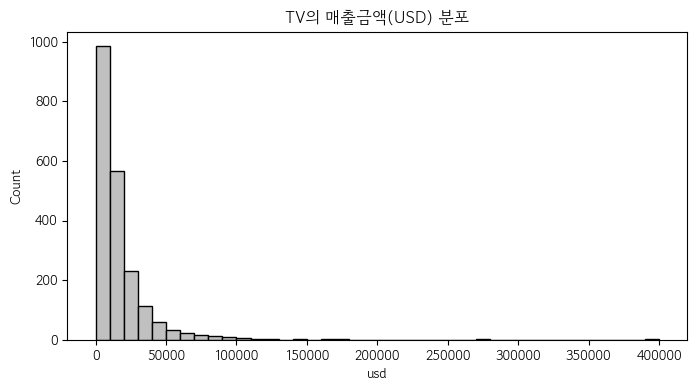

In [157]:
# raw_tv의 usd로 히스토그램을 그립니다.
# [힌트] sns.histplot() 함수를 사용하세요.
# [참고] binrange와 binwidth 매개변수를 추가하면 계급을 지정할 수 있습니다.
# [참고] fc(채우기색) 및 ec(테두리색) 매개변수를 추가하면 색을 지정할 수 있습니다.
sns.histplot(data = raw_tv, x = 'usd', 
             binrange = (0, 400000), binwidth = 10000,
             fc = 'silver', ec = 'black')

# 그래프 제목을 'TV의 매출금액(USD) 분포'로 지정합니다.
plt.title(label = 'TV의 매출금액(USD) 분포');

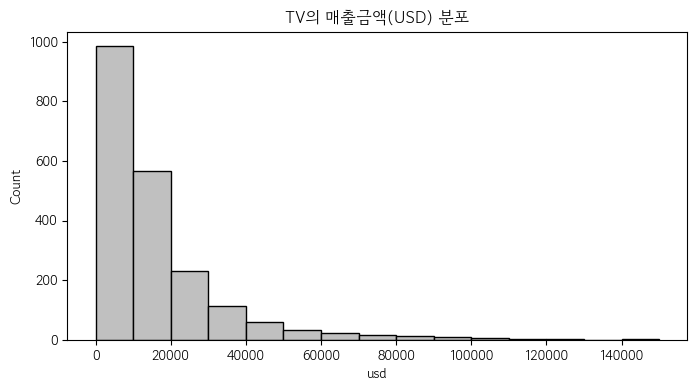

In [158]:
# 위 그래프에서 binrange의 오른쪽 끝값을 15000으로 설정합니다.
sns.histplot(data = raw_tv, x = 'usd', 
             binrange = (0, 150000), binwidth = 10000,
             fc = 'silver', ec = 'black')
plt.title(label = 'TV의 매출금액(USD) 분포');

usd를 vol로 나눈 usd_avg의 분포를 확인합니다.

In [159]:
# raw_tv에서 usd를 vol로 나눈 결과를 새 변수 usd_avg에 할당합니다.
raw_tv['usd_avg'] = raw_tv['usd'] / raw_tv['vol']

/var/folders/w0/zkdyjrqx66g94n4qfn2t2dl40000gn/T/ipykernel_84122/1252433333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tv['usd_avg'] = raw_tv['usd'] / raw_tv['vol']


In [160]:
# raw_tv의 usd_avg에 대한 기술통계량을 확인합니다.
raw_tv['usd_avg'].describe()[['min', 'max']]

min      17.250
max   28049.220
Name: usd_avg, dtype: float64

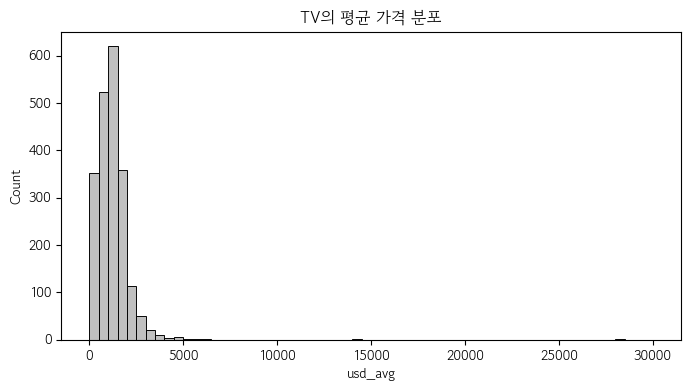

In [161]:
# raw_tv의 usd_avg로 히스토그램을 그립니다.
sns.histplot(data = raw_tv, x = 'usd_avg', 
             binrange = (0, 30000), binwidth = 500,
             fc = 'silver', ec = 'black')

# 그래프 제목을 'TV의 평균 가격 분포'로 지정합니다.
plt.title(label = 'TV의 평균 가격 분포');

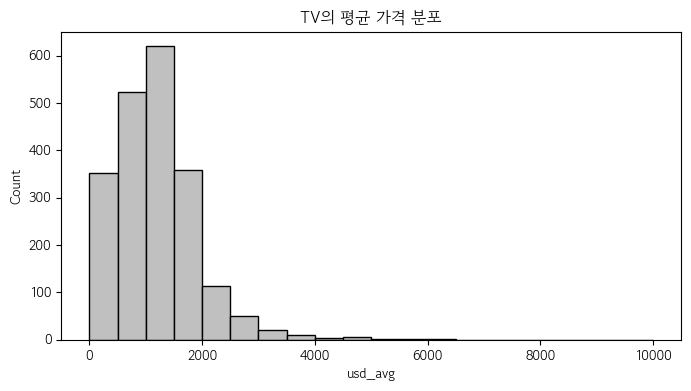

In [162]:
# 위 그래프에서 binrange의 오른쪽 끝값을 10000으로 설정합니다.
sns.histplot(data = raw_tv, x = 'usd_avg', 
             binrange = (0, 10000), binwidth = 500,
             fc = 'silver', ec = 'black')
plt.title(label = 'TV의 평균 가격 분포');

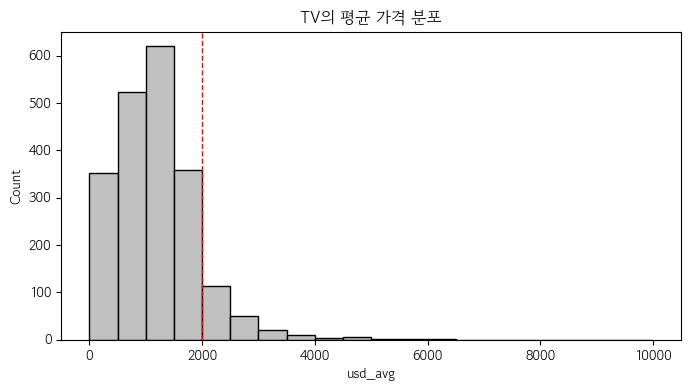

In [163]:
# 위 그래프에서 x축을 2000 기준으로 수직선을 추가합니다.
sns.histplot(data = raw_tv, x = 'usd_avg', 
             binrange = (0, 10000), binwidth = 500,
             fc = 'silver', ec = 'black')
plt.title(label = 'TV의 평균 가격 분포')
plt.axvline(x = 2000, color = 'red', lw = 1, ls = '--');

연속형 변수를 구간화하여 범주형 변수를 생성하고 막대 채우기 색을 다르게 설정합니다.

In [164]:
# usd_avg가 2000 이상이면 'high', 아니면 'low'인 값을 새 변수 usd_grd에 할당합니다.
raw_tv['usd_grd'] = np.where(raw_tv['usd_avg'].ge(2000), 'high', 'low')

/var/folders/w0/zkdyjrqx66g94n4qfn2t2dl40000gn/T/ipykernel_84122/2157971771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tv['usd_grd'] = np.where(raw_tv['usd_avg'].ge(2000), 'high', 'low')


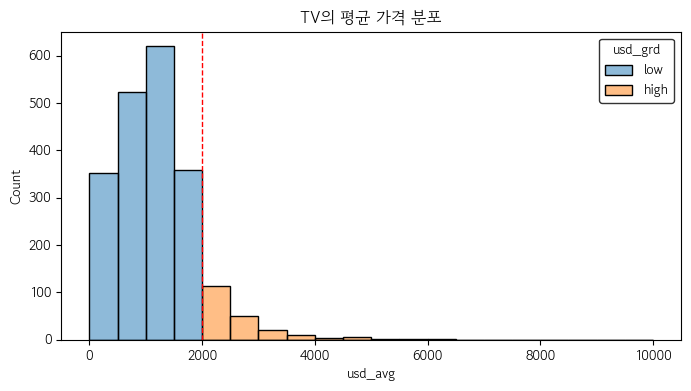

In [165]:
# 위 그래프에서 usd_grd 기준으로 채우기 색을 다르게 설정합니다.
sns.histplot(data = raw_tv, x = 'usd_avg', 
             binrange = (0, 10000), binwidth = 500, 
             hue = 'usd_grd', ec = 'black')
plt.title(label = 'TV의 평균 가격 분포')
plt.axvline(x = 2000, color = 'red', lw = 1, ls = '--');

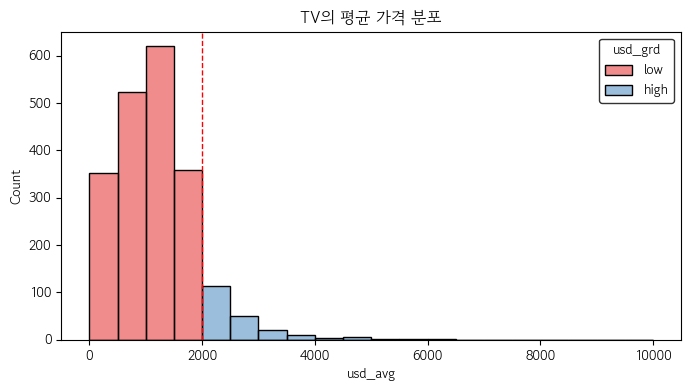

In [166]:
# 위 그래프에서 팔레트를 'Set1'으로 변경합니다.
sns.histplot(data = raw_tv, x = 'usd_avg', 
             binrange = (0, 10000), binwidth = 500, 
             hue = 'usd_grd', ec = 'black', palette = 'Set1')
plt.title(label = 'TV의 평균 가격 분포')
plt.axvline(x = 2000, color = 'red', lw = 1, ls = '--');

In [167]:
# 사용자 팔레트를 생성합니다. 색은 'silver', 'red'로 설정합니다.
myPal = ['silver', 'red']

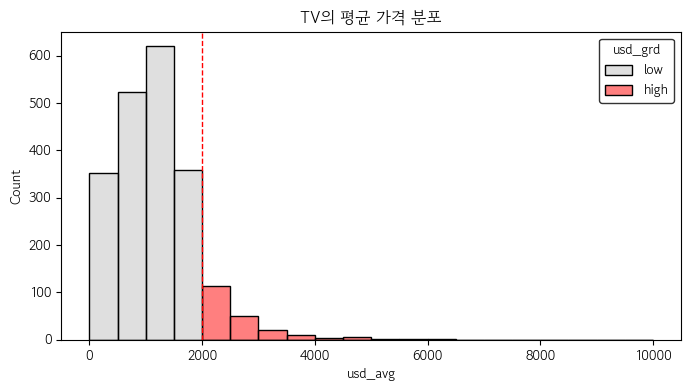

In [168]:
# 위 그래프에서 팔레트를 사용자 팔레트로 변경합니다.
sns.histplot(data = raw_tv, x = 'usd_avg', 
             binrange = (0, 10000), binwidth = 500, 
             hue = 'usd_grd', ec = 'black', palette = myPal)
plt.title(label = 'TV의 평균 가격 분포')
plt.axvline(x = 2000, color = 'red', lw = 1, ls = '--');

### 상자 수염 그림 그리기

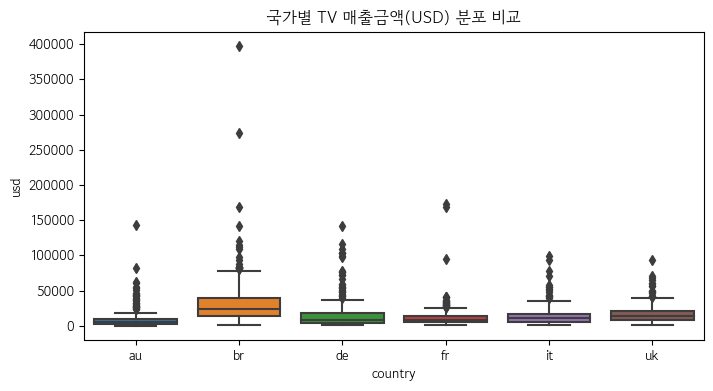

In [169]:
# raw_tv의 usd로 국가별 상자 수염 그림을 그립니다.
# [힌트] sns.boxplot() 함수를 사용하세요.
# [참고] x 매개변수에 범주형, y 매개변수에 연속형 변수를 지정합니다.
sns.boxplot(data = raw_tv, x = 'country', y = 'usd')

# 그래프 제목을 '국가별 TV 매출금액(USD) 분포 비교'로 지정합니다.
plt.title(label = '국가별 TV 매출금액(USD) 분포 비교');

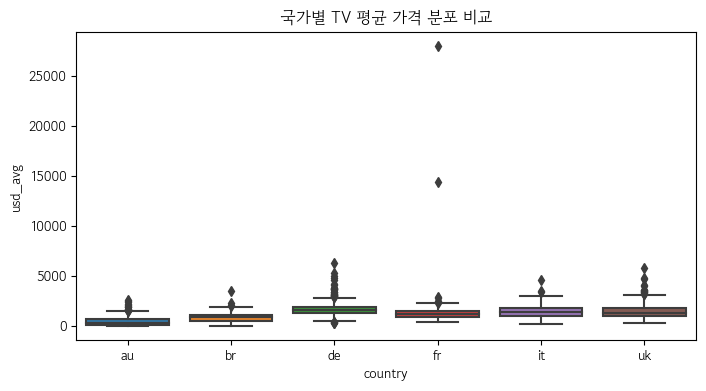

In [170]:
# raw_tv의 usd_avg로 국가별 상자 수염 그림을 그립니다.
sns.boxplot(data = raw_tv, x = 'country', y = 'usd_avg')

# 그래프 제목을 '국가별 TV 평균 가격 분포 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 분포 비교');

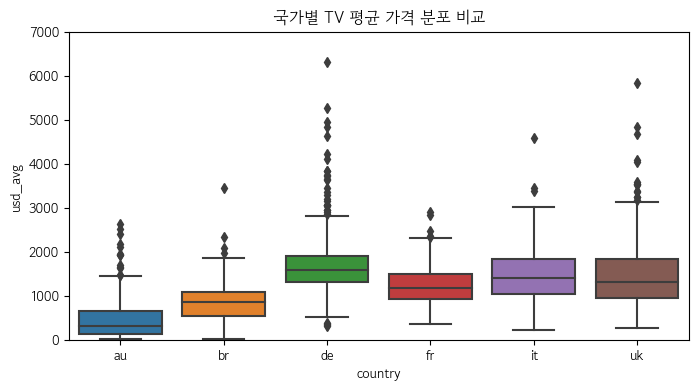

In [171]:
# 위 그래프에서 y축 범위를 0~7000으로 제한합니다.
sns.boxplot(data = raw_tv, x = 'country', y = 'usd_avg')
plt.title(label = '국가별 TV 평균 가격 분포 비교')
plt.ylim(0, 7000);

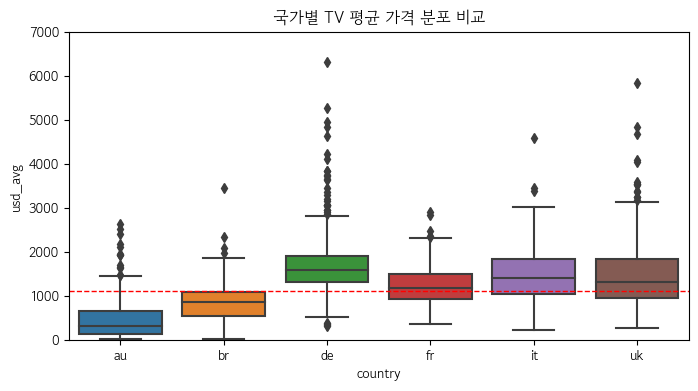

In [172]:
# 위 그래프에서 y축을 전체 중위수 기준으로 수평선을 추가합니다.
sns.boxplot(data = raw_tv, x = 'country', y = 'usd_avg')
plt.title(label = '국가별 TV 평균 가격 분포 비교')
plt.ylim(0, 7000)
plt.axhline(y = raw_tv['usd_avg'].median(), color = 'red', lw = 1, ls = '--');

### 막대 그래프 그리기

In [173]:
# merged를 출력합니다.
merged

vol_au    vol_br   vol_de   vol_fr  vol_it   
category subcategory                                                      
BS       IT_Laptop          107.000   631.000  961.000  785.000     181  \
         IT_Monitor         707.000  1774.000 6430.000 2339.000    1670   
         IT_Projector           NaN   333.000   99.000   64.000       8   
         Monitor            262.000       NaN 1212.000   38.000     204   
HA       Air_Conditioner        NaN  1575.000   44.000      NaN      91   
         Cooking_Appliance  717.000  1501.000  362.000  196.000     543   
         Dishwasher         386.000       NaN      NaN  141.000     269   
         Dryer              567.000       NaN  206.000  100.000    1433   
         Refrigerator      2320.000   746.000  730.000  541.000    2082   
         Vacuum_Cleaner     832.000       NaN   24.000   93.000     290   
         Washer            1248.000  5506.000  611.000  377.000    1976   
         Washer_Dryer       182.000   223.000  234.000  201.000     440   
HE       Audio_CAV          628.000  2423.000  895.000 1233.000     576   
         TV                6240.000 13974.000 2745.000 2976.000    3167   

                             vol_uk      usd_au       usd_br      usd_de   
category subcategory                                                       
BS       IT_Laptop          907.000  120568.370   663428.910 1126577.000  \
         IT_Monitor        3569.000  357615.100   588190.340 3933698.880   
         IT_Projector        48.000         NaN   197317.690  152640.030   
         Monitor             46.000   78368.610          NaN  789805.510   
HA       Air_Conditioner        NaN         NaN   894685.050   24673.910   
         Cooking_Appliance      NaN  130168.310   197218.910   28760.670   
         Dishwasher          40.000  237703.440          NaN         NaN   
         Dryer              508.000  447514.860          NaN  145945.680   
         Refrigerator      1542.000 1705464.250  1760975.490  730501.730   
         Vacuum_Cleaner         NaN  247938.160          NaN   12967.370   
         Washer            1305.000  846950.110  4995831.470  336781.790   
         Washer_Dryer       669.000  104226.410   497474.300  252817.880   
HE       Audio_CAV         2592.000  207558.480   678336.140  220243.350   
         TV                4480.000 3071010.740 11627958.450 4562673.270   

                                usd_fr      usd_it      usd_uk   avg_au   
category subcategory                                                      
BS       IT_Laptop          981187.830  172380.500  963043.240 1126.807  \
         IT_Monitor        1201386.730  530034.860 2042778.590  505.821   
         IT_Projector       112714.600    6193.160   77131.100      NaN   
         Monitor             16636.960   47689.950   34222.190  299.117   
HA       Air_Conditioner           NaN   78008.440         NaN      NaN   
         Cooking_Appliance   41747.690   78146.840         NaN  181.546   
         Dishwasher         100043.820  167639.740   42633.630  615.812   
         Dryer               82572.870  941321.620  617174.480  789.268   
         Refrigerator       693651.440 2531623.450 2851055.290  735.114   
         Vacuum_Cleaner      39157.520  136311.520         NaN  298.003   
         Washer             305726.660 1227169.780 1207918.680  678.646   
         Washer_Dryer       195989.940  340698.050  690194.700  572.673   
HE       Audio_CAV          377576.810  171648.630  614750.420  330.507   
         TV                4017971.880 4563924.620 6078313.740  492.149   

                             avg_br   avg_de   avg_fr   avg_it   avg_uk  
category subcategory                                                     
BS       IT_Laptop         1051.393 1172.297 1249.921  952.378 1061.790  
         IT_Monitor         331.562  611.773  513.633  317.386  572.367  
         IT_Projector       592.546 1541.818 1761.166  774.145 1606.898  
         Monitor                NaN  651

In [174]:
# merged의 행이름에 'TV'를 포함하는 행이름을 lab_tv에 할당합니다.
# [힌트] 리스트 컴프리헨션을 사용하세요.
lab_tv = [index for index in merged.index if 'TV' in index]

In [175]:
# lab_tv를 출력합니다.
lab_tv

[('HE', 'TV')]

In [176]:
# merged에서 행이름이 lab_tv인 행을 선택하여 mgd_tv에 할당합니다.
# [주의] 행이름으로 인덱싱하려면 반드시 loc 인덱서를 사용해야 합니다!
mgd_tv = merged.loc[lab_tv, :]

In [177]:
# mgd_tv를 출력합니다.
mgd_tv

,,vol_au,vol_br,vol_de,vol_fr,vol_it,vol_uk,usd_au,usd_br,usd_de,usd_fr,usd_it,usd_uk,avg_au,avg_br,avg_de,avg_fr,avg_it,avg_uk
category,subcategory,,,,,,,,,,,,,,,,,,
HE,TV,6240.000,13974.000,2745.000,2976.000,3167,4480.000,3071010.740,11627958.450,4562673.270,4017971.880,4563924.620,6078313.740,492.149,832.114,1662.176,1350.125,1441.088,1356.766


In [178]:
# mgd_tv의 열이름을 출력합니다.
mgd_tv.columns

Index(['vol_au', 'vol_br', 'vol_de', 'vol_fr', 'vol_it', 'vol_uk', 'usd_au',
       'usd_br', 'usd_de', 'usd_fr', 'usd_it', 'usd_uk', 'avg_au', 'avg_br',
       'avg_de', 'avg_fr', 'avg_it', 'avg_uk'],
      dtype='object')

In [179]:
# mgd_tv의 열이름에서 'avg'를 포함하는 열이름을 남겨 lab_avg에 할당합니다.
# [힌트] 리스트 컴프리헨션을 사용하세요.
lab_avg = [col for col in mgd_tv.columns if 'avg' in col]

In [180]:
# lab_avg를 출력합니다.
lab_avg

['avg_au', 'avg_br', 'avg_de', 'avg_fr', 'avg_it', 'avg_uk']

In [181]:
# mgd_tv의 열이름에서 'avg'를 포함하는 열만 선택한 결과를 출력합니다.
mgd_tv[lab_avg]

,,avg_au,avg_br,avg_de,avg_fr,avg_it,avg_uk
category,subcategory,,,,,,
HE,TV,492.149,832.114,1662.176,1350.125,1441.088,1356.766


In [182]:
# mgd_tv의 열이름에서 'avg'를 포함하는 열을 Long Type으로 변환합니다.
# [힌트] melt() 함수를 사용하세요.
# [참고] 열이름으로 인덱싱할 때는 loc 인덱스를 생략할 수 있습니다.
mgd_tv[lab_avg].melt()

,variable,value
0,avg_au,492.149
1,avg_br,832.114
2,avg_de,1662.176
3,avg_fr,1350.125
4,avg_it,1441.088
5,avg_uk,1356.766


In [183]:
# 위 코드 실행 결과를 mgd_tv_avg에 할당합니다.
mgd_tv_avg = mgd_tv[lab_avg].melt()

In [184]:
# mgd_tv_avg의 열이름을 'country', 'usd_avg'로 변경합니다.
mgd_tv_avg.columns = ['country', 'usd_avg']

In [185]:
# country 열의 원소에서 문자열 'avg_'를 삭제한 결과를 출력합니다.
# [힌트] str.replace() 함수를 사용하세요.
mgd_tv_avg['country'].str.replace(pat = 'avg_', repl = '')

0    au
1    br
2    de
3    fr
4    it
5    uk
Name: country, dtype: object

In [186]:
# 위 코드 실행 결과를 country 열에 재할당합니다.
mgd_tv_avg['country'] = mgd_tv_avg['country'].str.replace(pat = 'avg_', repl = '')

In [187]:
# mgd_tv_avg를 출력합니다.
mgd_tv_avg

,country,usd_avg
0,au,492.149
1,br,832.114
2,de,1662.176
3,fr,1350.125
4,it,1441.088
5,uk,1356.766


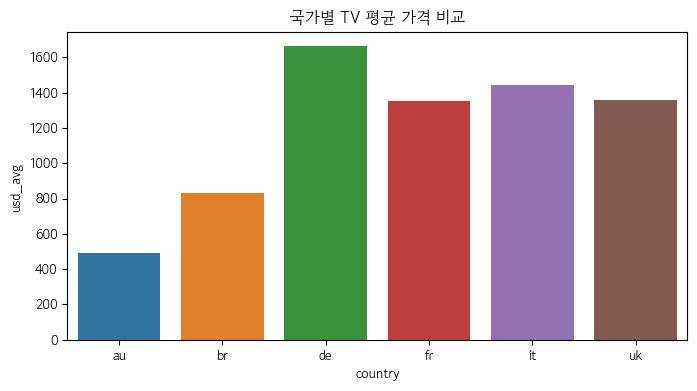

In [188]:
# mgd_tv_avg로 막대 그래프를 그립니다.
# [힌트] sns.barplot() 함수를 사용하세요.
# [참고] x 매개변수에 범주형, y 매개변수에 연속형 변수를 지정합니다.
sns.barplot(data = mgd_tv_avg, x = 'country', y = 'usd_avg')

# 그래프 제목을 '국가별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 비교');

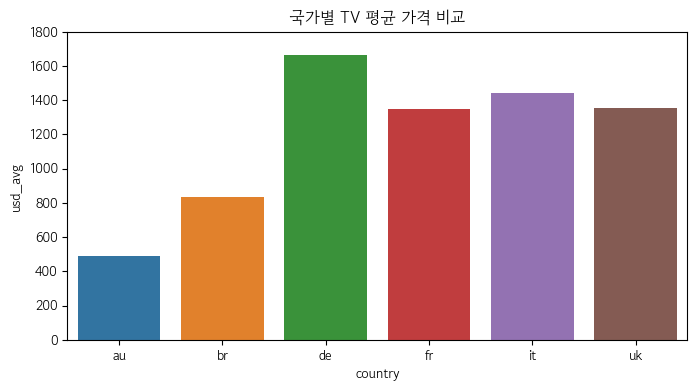

In [189]:
# 위 그래프에서 y축을 0 ~ 1800로 제한합니다.
sns.barplot(data = mgd_tv_avg, x = 'country', y = 'usd_avg')
plt.title(label = '국가별 TV 평균 가격 비교')
plt.ylim(0, 1800);

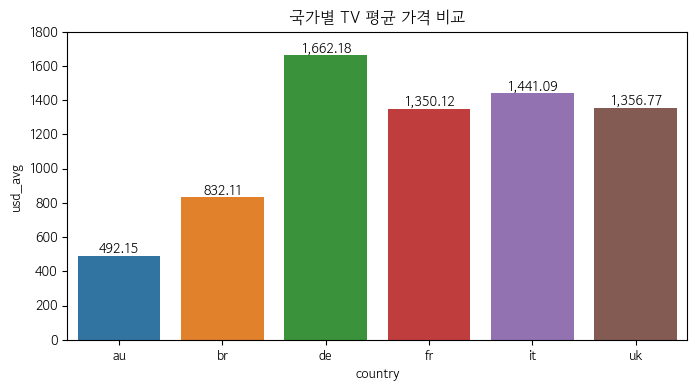

In [190]:
# 위 그래프에서 막대 위에 평균 가격을 텍스트로 추가합니다.
# [참고] f-문자열로 평균 가격을 소수점 둘째 자리까지 남기면 보기에 좋습니다.
sns.barplot(data = mgd_tv_avg, x = 'country', y = 'usd_avg')
plt.title(label = '국가별 TV 평균 가격 비교')
plt.ylim(0, 1800)
for i, v in enumerate(mgd_tv_avg['usd_avg']):
    plt.text(x = i, y = v, s = f'{v:,.2f}', ha = 'center', va = 'bottom')

In [191]:
# 사용자 팔레트를 생성합니다. 'silver'를 막대 개수만큼 반복합니다.
myPal = np.tile(A = 'silver', reps = 6)

In [192]:
# 세 번째(2번 인덱스) 막대를 'red'로 변경합니다.
myPal[2] = 'red'

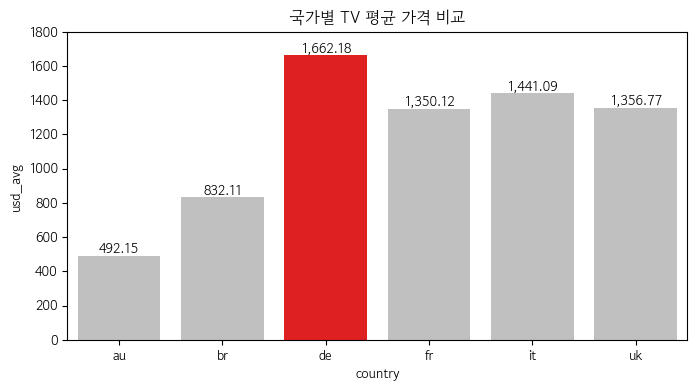

In [193]:
# 위 그래프에서 팔레트를 사용자 팔레트로 변경합니다.
sns.barplot(data = mgd_tv_avg, x = 'country', y = 'usd_avg', palette = myPal)
plt.title(label = '국가별 TV 평균 가격 비교')
plt.ylim(0, 1800)
for i, v in enumerate(mgd_tv_avg['usd_avg']):
    plt.text(x = i, y = v, s = f'{v:,.2f}', ha = 'center', va = 'bottom')

### 선 그래프 그리기

In [194]:
# raw_tv의 처음 5행을 출력합니다.
raw_tv.head()

,country,date,category,subcategory,page,cart,vol,usd,month,usd_avg,usd_grd
0,au,2022-01-01,HE,TV,4485,17,10,398.960,1,39.896,low
2,au,2022-01-02,HE,TV,4676,14,3,113.990,1,37.997,low
6,au,2022-01-03,HE,TV,4965,27,9,5806.630,1,645.181,low
12,au,2022-01-04,HE,TV,5035,62,14,3088.300,1,220.593,low
15,au,2022-01-05,HE,TV,4762,65,13,5387.380,1,414.414,low


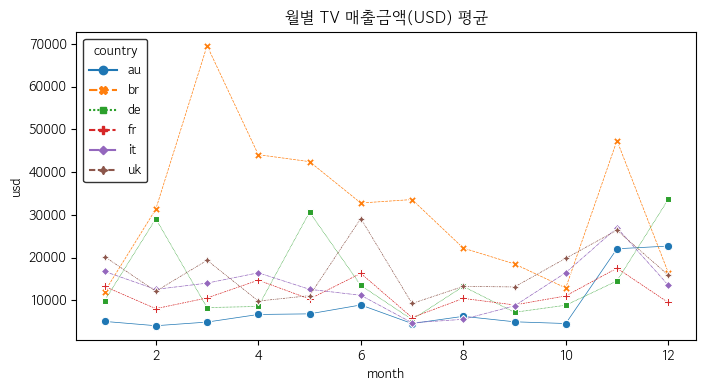

In [195]:
# raw_tv의 month별 국가의 usd 평균을 선 그래프로 그립니다.
# [힌트] sns.lineplot() 함수를 사용하세요.
sns.lineplot(data = raw_tv, x = 'month', y = 'usd', 
             hue = 'country', estimator = np.mean, errorbar = None, 
             markers = True, style = 'country', lw = 0.5)

# 그래프 제목을 '월별 TV 매출금액(USD) 평균'으로 지정합니다.
plt.title(label = '월별 TV 매출금액(USD) 평균');

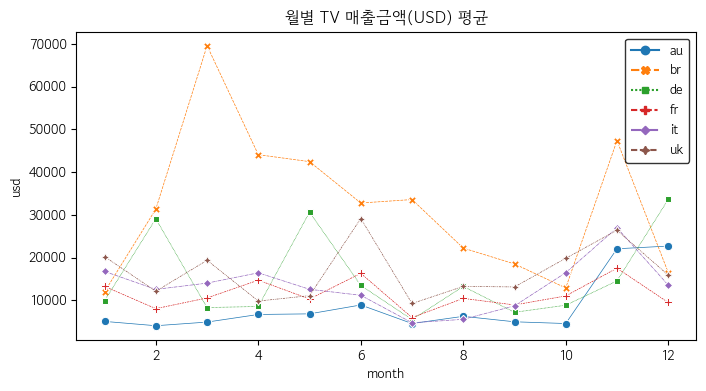

In [196]:
# 위 그래프에서 범례의 위치를 오른쪽 상단으로 변경합니다.
sns.lineplot(data = raw_tv, x = 'month', y = 'usd', 
             hue = 'country', estimator = np.mean, errorbar = None, 
             markers = True, style = 'country', lw = 0.5)
plt.title(label = '월별 TV 매출금액(USD) 평균')
plt.legend(loc = 'upper right');

## End of Document